In [1]:
dataset_name = "W16_comb"
df_list = [
           "BES_Panel",
#            "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

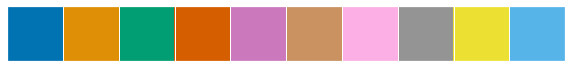

In [2]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML
plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
from utility import *
import gaussian_kde

import warnings
warnings.filterwarnings('ignore')


In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [4]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

In [5]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")

In [6]:
global best_weight_series
def weighted_mean(series):
    return (series*best_weight_series.loc[series.index]).sum()/(best_weight_series.loc[series.index]).sum()


In [7]:
fn = BES_data_folder+"parliamentary constituency data"+os.sep+"Lots of aggregated parliamentary data.csv"
BES_census_data = pd.read_csv(fn).drop(["Unnamed: 0"],axis=1)

In [ ]:
# https://www.ons.gov.uk/methodology/methodologicalpublications/generalmethodology/ukparliamentaryconstituencies/datacatalogueforparliamentaryconstituencies
# https://www.nomisweb.co.uk/census/2011/all_tables
# https://github.com/virgesmith/UKCensusAPI


In [8]:
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GRN","Green":"GRN",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 'No - none':"NON",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",
 "Speaker":"SPK","Speaker.":"SPK",}

party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LD":"orange",
                     "Grn":'green',"GRN":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "SPK":'black',"SPE":'black',
                     "OTH":'brown',
                     "UNKNOWN":'grey'}

# ['olive', 'purple', 'orange', 'red', 'cyan',
#                       'limegreen', 'darkred', 'blue', 'chocolate',
#                       'pink', 'darkgreen', 'yellow', 'darkorange','magenta', 'mediumspringgreen', 'tomato', 'teal',
#                       'goldenrod',  'indianred']

In [9]:
stub = "CLOCKFACEREP_"
x_axis = stub+"diversity_flatter"
y_axis = stub+"security_flatter"

In [10]:
stub = "POLCOMP_"
x_axis = stub+"Ec-Left-Right"
y_axis = stub+"Soc-Lib-Con"


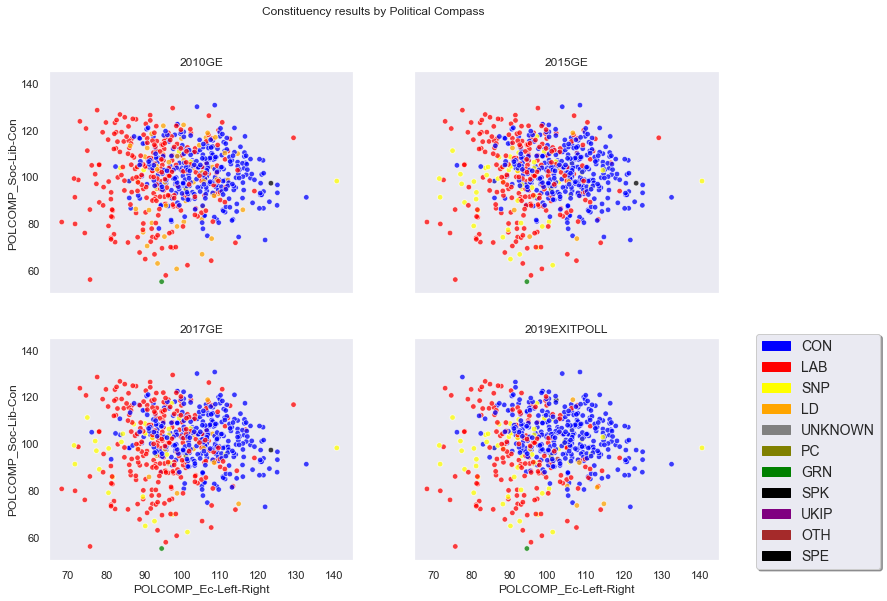

In [11]:
import matplotlib.patches as mpatches
title = 'Constituency results by Populus\' ClockFace pseudo-replication'
title = 'Constituency results by Political Compass'
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,9))
fig.suptitle(title)
xlim = [65,145]
ylim = [50,145]
sns.scatterplot(x=x_axis, y=y_axis, data=BES_census_data,
                     hue = BES_census_data["Winner10"].replace(replace_dict),
                     palette = party_colour_dict, ax=ax1, legend = False, alpha=.75, s=30)
ax1.set_title("2010GE")
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
sns.scatterplot(x=x_axis, y=y_axis, data=BES_census_data,
                     hue = BES_census_data["Winner15"].replace(replace_dict),
                     palette = party_colour_dict, ax=ax2, legend = False, alpha=.75, s=30)
ax2.set_title("2015GE")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
sns.scatterplot(x=x_axis, y=y_axis, data=BES_census_data,
                     hue = BES_census_data["Winner17"].replace(replace_dict),
                     palette = party_colour_dict, ax=ax3, legend = False, alpha=.75, s=30)
ax3.set_title("2017GE")
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
sns.scatterplot(x=x_axis, y=y_axis, data=BES_census_data,
                     hue = "EXITPOLL_partyCodeNew",
                     palette = party_colour_dict, ax=ax4, legend = False, alpha=.75, s=30)
ax4.set_title("2019EXITPOLL")
ax4.set_xlim(xlim)
ax4.set_ylim(ylim)


legend_patch_list = []
parties_present = BES_census_data[["Winner10","Winner15","Winner17","EXITPOLL_partyCodeNew"]].replace(np.nan,"UNKNOWN").replace(replace_dict).applymap(lambda x: x.upper()).stack().value_counts().index
for party in parties_present:
    legend_patch_list.append( mpatches.Patch(color=party_colour_dict[party], label=party) )
plt.legend(handles=legend_patch_list, bbox_to_anchor=(1.1, 1.05),
           fancybox=True, shadow=True, fontsize=14)

for ax in fig.get_axes():
    ax.label_outer()

In [22]:
# pattern = "LAB_TO_CON"
# name = "LAB_TO_CON"
# corr_type = "spearman"
# df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]], name, corr_type)
# display_corr(df, name, corr_type)


In [9]:
fn = BES_data_folder+"parliamentary constituency data"+os.sep+"BES_constituency_aggregates.csv"
panoBES = pd.read_csv(fn)

In [114]:
pattern = "LAB_TO_CON"
name = "LAB_TO_CON"
corr_type = "spearman"
df,corr_type = make_corr_summary(panoBES, name, corr_type)
display_corr(df, name, corr_type)


,r,p,N
mii_catW8_foreign affairs,0.18,0.00,631
profile_religionW13_Yes - Methodist,0.16,0.00,631
educationW7_City and Guild certificate - advanced,0.16,0.00,631
responsibleCostLiveNoneW4_Yes,0.16,0.00,631
miilabelW5_youth,0.15,0.00,631
partyContactLab_2W12_Yes,0.15,0.00,631
winConstituencyLabW5__100 - Very likely to win,0.15,0.00,631
mii_catW4_Referendum unspecified,0.15,0.00,631
miilabelW2_pol values-left,0.15,0.00,631
pccVote1W7_The Labour candidate,0.14,0.00,631


In [74]:
# BES_census_data.drop( [x for x in BES_census_data.columns if "RESULTS2019_" in x],axis=1,inplace=True )

In [12]:
BES_census_data

,pano,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner17,Con17,Lab17,LD17,...,RESULTS2019_SNP,RESULTS2019_PC,RESULTS2019_BXP,RESULTS2019_UKIP,RESULTS2019_OTHER,RESULTS2019_Registered Voters,RESULTS2019_Turnout,FOCALDATAMRP_DEC_Winner,YOUGOVMRP_DEC_Winner,YOUGOVMRP_NOV_Winner
0,1,W07000049,Aberavon,Wales,Wales,County,Labour,17.737766,68.119514,1.800529,...,0.0,2711.0,3108.0,0.0,731,50747,62.27,Labour,Lab,Lab
1,2,W07000058,Aberconwy,Wales,Wales,County,Conservative,44.594090,42.618974,2.926905,...,0.0,2704.0,0.0,0.0,0,44699,71.29,Conservative,Con,Con
2,3,S14000001,Aberdeen North,Scotland,Scotland,Borough,Scottish National Party,22.692276,30.010610,4.605925,...,20205.0,0.0,1008.0,0.0,0,62489,59.87,SNP,SNP,SNP
3,4,S14000002,Aberdeen South,Scotland,Scotland,Borough,Conservative,42.132470,20.549300,5.866091,...,20388.0,0.0,0.0,0.0,0,65719,69.44,Conservative,Con,Con
4,5,S14000058,West Aberdeenshire and Kincardine,Scotland,Scotland,County,Conservative,47.852785,11.052785,8.641162,...,21909.0,0.0,0.0,0.0,0,72640,73.44,Conservative,Con,Con
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,646,E14001060,Yeovil,England,South West,County,Conservative,54.489597,12.487375,29.705070,...,0.0,0.0,0.0,0.0,875,82468,71.86,Conservative,Con,Con
628,647,W07000041,Ynys Mon,Wales,Wales,County,Labour,27.789226,41.863141,1.281880,...,0.0,10418.0,2184.0,0.0,0,51925,70.39,Labour,Lab,Con
629,648,E14001061,York Central,England,Yorkshire and The Humber,Borough,Labour,30.174427,65.163502,4.662071,...,0.0,0.0,1479.0,0.0,691,74801,66.18,Labour,Lab,Lab
630,649,E14001062,York Outer,England,Yorkshire and The Humber,County,Conservative,51.118812,36.684835,10.291326,...,0.0,0.0,0.0,0.0,692,74673,74.12,Conservative,Con,Con


In [13]:
Electoral_vars = pd.DataFrame()


Electoral_vars["CON_perc_2019"]    = (BES_census_data["RESULTS2019_CON"]/BES_census_data["RESULTS2019_Registered Voters"])
Electoral_vars["LAB_perc_2019"]    = (BES_census_data["RESULTS2019_LAB"]/BES_census_data["RESULTS2019_Registered Voters"])
Electoral_vars["LIBDEM_perc_2019"] = (BES_census_data["RESULTS2019_LIBDEM"]/BES_census_data["RESULTS2019_Registered Voters"])
Electoral_vars["LD_LAB_perc_2019"] = Electoral_vars["LAB_perc_2019"] + Electoral_vars["LIBDEM_perc_2019"]


Electoral_vars["CON_perc_2017"]    = BES_census_data["Con17"]
Electoral_vars["LAB_perc_2017"]    = BES_census_data["Lab17"]
Electoral_vars["LIBDEM_perc_2017"] = BES_census_data["LD17"]
Electoral_vars["LD_LAB_perc_2017"] = Electoral_vars["LAB_perc_2017"]+Electoral_vars["LIBDEM_perc_2017"]


Electoral_vars["CON_v_LDLAB_swing"]= ((Electoral_vars["CON_perc_2019"]-Electoral_vars["CON_perc_2017"])\
                                      -(Electoral_vars["LD_LAB_perc_2019"]-Electoral_vars["LD_LAB_perc_2017"]))/2


Electoral_vars["CON1719"] = BES_census_data["RESULTS2019_CON"] - BES_census_data["ConVote17"]
Electoral_vars["LD1719"]  = BES_census_data["RESULTS2019_LIBDEM"] - BES_census_data["LDVote17"]
Electoral_vars["LAB1719"] = BES_census_data["RESULTS2019_LAB"] - BES_census_data["LabVote17"]
Electoral_vars["GRN1719"] = BES_census_data["RESULTS2019_GRN"] - BES_census_data["GreenVote17"]

Electoral_vars["CON1719"] = BES_census_data["RESULTS2019_CON"] - BES_census_data["ConVote17"]
Electoral_vars["LD1719"]  = BES_census_data["RESULTS2019_LIBDEM"] - BES_census_data["LDVote17"]
Electoral_vars["LAB1719"] = BES_census_data["RESULTS2019_LAB"] - BES_census_data["LabVote17"]
Electoral_vars["GRN1719"] = BES_census_data["RESULTS2019_GRN"] - BES_census_data["GreenVote17"]

Electoral_vars["UKIP_BXP19"] = (BES_census_data["RESULTS2019_BXP"]+BES_census_data["RESULTS2019_UKIP"])
Electoral_vars["UKIP_BXP1719"] = Electoral_vars["UKIP_BXP19"] - BES_census_data["UKIPVote17"]
Electoral_vars["UKIP_BXP1519"] = Electoral_vars["UKIP_BXP19"] - BES_census_data["UKIPVote15"]

Electoral_vars["LAB_TO_CON"] = (BES_census_data["Winner17"]=="Labour") & (BES_census_data["EXITPOLL_partyCodeNew"]=="CON")
Electoral_vars["CON_TO_LAB"] = (BES_census_data["Winner17"]=="Conservative") & (BES_census_data["EXITPOLL_partyCodeNew"]=="LAB")

Electoral_vars.index = BES_census_data["ONSConstID"].values
Electoral_vars.index.name = "ONSConstID"

In [29]:
def mean_sd(name,label):
    return name+" (Mean Change = "+str(Electoral_vars.loc[EnglandWales,label].mean().astype('int'))+",SD Change = "+str(Electoral_vars.loc[EnglandWales,label].std().astype('int'))+")"


In [41]:
EnglandWales = [x for x in Electoral_vars.index if re.match("W\d|E\d",x)]

SpeakerSeat = "E14000637"
EnglandWales.remove(SpeakerSeat)

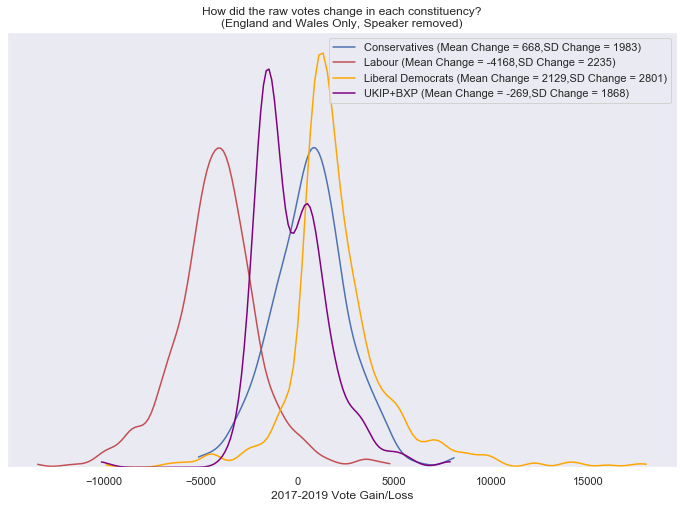

In [46]:

plt.figure(figsize=(12,8))
sns.kdeplot(Electoral_vars.loc[EnglandWales,"CON1719"], cut=0, color = 'b',label = mean_sd("Conservatives","CON1719") )
sns.kdeplot(Electoral_vars.loc[EnglandWales,"LAB1719"], cut=0, color = 'r',label = mean_sd("Labour","LAB1719") )
sns.kdeplot(Electoral_vars.loc[EnglandWales,"LD1719"],  cut=0, color = 'orange',label = mean_sd("Liberal Democrats","LD1719") )
# sns.kdeplot(Electoral_vars.loc[EnglandWales,"GRN1719"],  cut=0, color = 'g',label = mean_sd("Greens","GRN1719"))
sns.kdeplot(Electoral_vars.loc[EnglandWales,"UKIP_BXP1719"],  cut=0, color = 'purple',label = mean_sd("UKIP+BXP","UKIP_BXP1719") )

# sns.kdeplot(GRN1719,  cut=0, color='g', label = "Greens (Mean Change = "+str(GRN1719.mean().astype('int'))+")")

# print( CON1719.mean(), CON1719.std() )
plt.yticks([])
plt.xlabel("2017-2019 Vote Gain/Loss");
plt.title("How did the raw votes change in each constituency?\n(England and Wales Only, Speaker removed)");

In [47]:
Electoral_vars.loc[EnglandWales,"LD1719"].sort_values()

ONSConstID
E14000848    -9863.0
E14000780    -6795.0
E14000958    -6162.0
E14000961    -5781.0
E14000602    -5201.0
              ...   
E14000953    17407.0
E14000697    18015.0
E14000598        NaN
E14000608        NaN
E14000928        NaN
Name: LD1719, Length: 572, dtype: float64

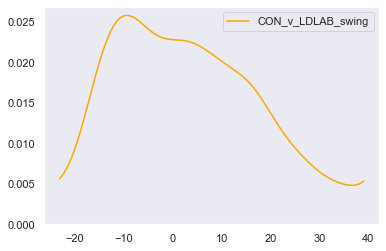

In [128]:
sns.kdeplot(Electoral_vars["CON_v_LDLAB_swing"],  cut=0, color = 'orange',label = "CON_v_LDLAB_swing");

In [228]:
pattern = "(CON_v_LDLAB_swing|Lab\d\d|Con\d\d|FOCALDATA|YOUGOV|RESULTS|Vote\d\d)"
name = "CON_v_LDLAB_swing"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type)

,r,p,N
c11CarsNone,0.81,0.00,609
c11Deprived3,0.74,0.00,609
c11NSSECNeverWorked,0.73,0.00,609
c11NoAdultsEmployedChildren,0.71,0.00,609
c11Neverworked,0.71,0.00,609
REFERRALS_Number of people who have been referred,0.71,0.00,609
CHILDTAXCREDITS_% of Children in low-income[...],0.7,0.00,609
DISEASES_Serious Mental Illness,0.7,0.00,518
c11Unemployed,0.68,0.00,609
REFERRALS_Number of referrals that did achieve a[...],0.68,0.00,609


In [98]:
pattern = "(LAB1719|LDVote17|LabVote10|LabVote15|UKIPVote15)"#"|Lab\d\d|Con\d\d|FOCALDATA|YOUGOV|RESULTS|Vote\d\d|LD\d\d|UKIP\d\d)"
name = "LAB1719"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type,top_num=25)

,r,p,N
c11PassportOceania,0.39,0.00,571
remainHanretty,0.35,0.00,630
STAMPDUTY_All property Estimated Property Value,0.35,0.00,531
STAMPDUTY_All property Receipts,0.35,0.00,531
STAMPDUTY_Residential Receipts,0.34,0.00,531
STAMPDUTY_Residential Estimated Property Value,0.34,0.00,531
c11Degree,0.34,0.00,571
RESULTS2019_Turnout,0.34,0.00,630
c11ReligionNotStated,0.33,0.00,630
LD17,0.32,0.00,628


In [95]:
panoBES["CON1719"] = CON1719.values
BES_census_data["CON1719"] = CON1719.values
panoBES["LD1719"] = LD1719.values
BES_census_data["LD1719"] = LD1719.values
panoBES["LAB1719"] = LAB1719.values
BES_census_data["LAB1719"] = LAB1719.values

In [97]:
pattern = "LAB1719"
name = "LAB1719"
corr_type = "spearman"
df,corr_type = make_corr_summary(panoBES,
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type)


,r,p,N
partyContactLD_2W6_Yes,0.25,0.00,630
partyContactLDW6_Yes,0.24,0.00,630
discussantVoteName1W2_Liberal Democrat,0.23,0.00,630
partyContactCon_2W4_Yes,0.22,0.00,630
partyContact1W4_Yes,0.22,0.00,630
partyContactConW6_Yes,0.22,0.00,630
preferLabMajorityW5__Ranked fifth,0.2,0.00,630
generalElectionVoteW6_Liberal Democrat,0.19,0.00,630
winConstituencyLDW5__100 - Very likely to win,0.19,0.00,630
mapConW3,0.19,0.00,630


In [33]:
import shap
import xgboost as xgb
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [19]:
BES_cens = BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]].copy()
# BES_cens = panoBES.copy()
BES_cens.columns = [x.replace("<","LT") for x in BES_cens.columns]
# BES_cens.drop([x for x in BES_cens.columns if re.match("RESULTS2019_LAB|.*Vote\d\d$|YOUGOVMRP_(DEC|NOV)_Lab|FOCALDATAMRP_DEC_Labour",x)],
#               axis=1,inplace=True)

In [ ]:
Treatment = "xgboost_bes_LAB1719"
var_stub = "LAB1719"
global var_list
var_list = ["LAB1719"]

var_stub_list = [var_stub, "LAB1719"]

In [34]:
# ImmigDiff = get_diff(["likeCorbyn"])#.notnull().sum()

# var_list = ImmigDiff.columns

# ["profile_education_age","workingStatus","profile_work_stat",]

optional_mask = False
sample_wts = False
drop_other_waves = False


# Leavers only
def optional_mask_fn(wave=[]):
    return 1
#(BES_Panel["profile_eurefvote"]=="Leave the EU")



def create_train(drop_other_waves):
    keep_list = BES_cens.columns
    
    if drop_other_waves:
        # drop variables from other waves
        other_waves = get_other_wave_pattern(wave_no, max_wave, num_to_wave)
        keep_list = [x for x in keep_list if not re.search( other_waves, x )]
        
    # drop key variables
    keep_list = [x for x in keep_list if not any([var_stub in x for var_stub in var_stub_list])] 
    
    return BES_cens[keep_list]


def create_target(target_var):
    
    return BES_cens[target_var]

objective = 'reg:linear'
eval_metric = 'rmse'

seed = 27
test_size = 0.33
minimum_sample = 100
early_stoppping_fraction = .1

alg = XGBRegressor(
 learning_rate =0.05,
 n_estimators= 1000,
 max_depth=10,
 min_child_weight=6,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.7,
 colsample_bylevel=.85,
 objective= objective,
 scale_pos_weight=1.0,
 reg_alpha=0.01,
 reg_lambda=1,
 njobs=3,
 seed=seed**2)

# alg = XGBRegressor(**best_params)

In [35]:
global var_list
def xgboost_run(title, subdir=None, min_features=30, dependence_plots=False, threshold = .1,
                output_folder=".."+os.sep+"Output"+os.sep,Treatment="default"):
    # for target_var,base_var in zip(var_list,base_list):
    treatment_subfolder = create_subdir(output_folder,Treatment)

    for target_var in var_list:
        if sample_wts:
            wave_no = get_wave_no( target_var )
            weight_var = num_to_weight[wave_no]    
            print( target_var, wave_no )

        target = create_target(target_var)
        mask   = target.notnull()
        if optional_mask & sample_wts:
            mask = mask&optional_mask_fn(wave_no)
        else:
            mask = mask&optional_mask_fn()
        target = target[mask]

        if sum(mask) < minimum_sample:
            continue

        train = create_train(drop_other_waves)

        if subdir is None:
            output_subfolder = create_subdir(treatment_subfolder,target_var)
        else:
            output_subfolder = create_subdir(treatment_subfolder,subdir)

        if sample_wts:
            sample_weights = weights[weight_var][mask]
            print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
            sample_weights = sample_weights.fillna(sample_weights.median())
        else:
            sample_weights = None
    #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
    #         # fit to full dataset at non-overfitting level
    #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
    #     else:

        get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
                                  sample_weights=sample_weights )
        # fit to full dataset at non-overfitting level
        alg.fit(train, target, verbose = True, sample_weight = sample_weights)


    #################

        explainer = shap.TreeExplainer(alg)
        shap_values = explainer.shap_values(train)
        
#         shap_values = shap.TreeExplainer(alg).shap_values(train);

        shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
        if shap_problem:
            print("hit problem!")
            shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

        shap_outputs(shap_values, train, target_var, output_subfolder, threshold = threshold,
                     min_features = min_features, title=title,
                     dependence_plots=dependence_plots)
        
    return (explainer, shap_values)




In [43]:
colname = "LAB1719"
# BES_cens = BES_cens_base[fertility_columns+age_columns+["leaveHanretty"]+["c11Degree"]]
# BES_cens.drop("LAB_TO_CON",axis=1,inplace=True)
mask = BES_cens[colname].notnull()
xgboost_run(subdir=colname,min_features = min(BES_cens.shape[1]-1,20), threshold=500,
           title = colname+"\n\nPredicts - LAB1719 Fall <---   ---> Predicts LAB1719 Rise")

KeyError: 'LAB1719'

In [349]:
# BES_cens.drop("CON_v_LDLAB_swing",axis=1,inplace=True)

In [351]:
# BES_cens.drop([x for x in BES_cens.columns if "partyContact" in x],axis=1,inplace=True)

In [ ]:
MSE: 2544035.70, MAE: 1122.08, EV: 0.54, R2: 0.53

In [323]:
min(BES_cens.shape[1]-1,20)

20

In [328]:
target = create_target("LAB1719")[mask]
train = create_train(drop_other_waves)[mask]

In [329]:
### xgboost_tuner
# https://github.com/cwerner87/xgboost-tuner

from xgboost_tuner.tuner import tune_xgb_params

# train = X.values
# label = rounded_targets

# metric_sklearn = ‘neg_mean_squared_error’ or 'remse'
# estimator_cls = xgb.XGBClassifier, xgb.XGBRegressor


# Tune the parameters incrementally and limit the range for colsample_bytree and subsample
best_params, history = tune_xgb_params(
    cv_folds = 3,
    label = target,
    metric_sklearn = 'neg_mean_squared_error',
    metric_xgb = "rmse",
    n_jobs = 4,
    objective = 'reg:linear',
    random_state = seed,
    strategy = 'randomized',
    train = train,
#     init_colsample_bylevel=.85,
    init_colsample_bytree = 0.7,
    init_gamma = 0.0,
    init_max_depth = 10,
    init_min_child_weight  = 6,
    init_subsample = 0.6,
    learning_rates = [0.03,.04,.05,.06],
)

# alg = XGBRegressor(
#  learning_rate =0.05,
#  n_estimators= 1800,
#  max_depth=10,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.6,
#  colsample_bytree=0.7,
#  colsample_bylevel=.85,
#  objective= objective,
#  scale_pos_weight=1.0,
#  reg_alpha=0.01,
#  reg_lambda=1,
#  njobs=3,
#  seed=seed**2)

[0]	train-rmse:4447.46+31.2659	test-rmse:4466.44+60.2586
[1]	train-rmse:4221.49+31.5466	test-rmse:4249.62+65.9551
[2]	train-rmse:4007.76+29.6811	test-rmse:4061.43+72.6686
[3]	train-rmse:3810.83+27.4086	test-rmse:3877.17+76.2413
[4]	train-rmse:3624.88+22.9786	test-rmse:3713.91+83.066
[5]	train-rmse:3445.48+24.4041	test-rmse:3547.06+85.575
[6]	train-rmse:3281.6+21.522	test-rmse:3408.19+94.1663
[7]	train-rmse:3124.82+27.7038	test-rmse:3271.43+87.6736
[8]	train-rmse:2976.39+21.5701	test-rmse:3143.45+98.3058
[9]	train-rmse:2839.48+22.4227	test-rmse:3029.35+104.755
[10]	train-rmse:2710.19+21.7207	test-rmse:2921.38+108.398
[11]	train-rmse:2586.62+20.7376	test-rmse:2811.45+109.422
[12]	train-rmse:2473.84+25.642	test-rmse:2718.06+104.683
[13]	train-rmse:2363.02+23.3005	test-rmse:2630.95+106.97
[14]	train-rmse:2260.81+21.4674	test-rmse:2554.42+114.47
[15]	train-rmse:2162.11+24.0568	test-rmse:2479.87+119.617
[16]	train-rmse:2070.78+21.7763	test-rmse:2410.46+117.456
[17]	train-rmse:1985.31+22.1235

[142]	train-rmse:258.954+14.8769	test-rmse:1623.07+94.7684
[143]	train-rmse:256.213+14.2585	test-rmse:1623.63+94.551
[144]	train-rmse:254.553+14.5717	test-rmse:1623.47+94.9622
[145]	train-rmse:252.874+15.0145	test-rmse:1623.85+94.5371
[146]	train-rmse:250.784+15.5159	test-rmse:1624.83+93.5704
[147]	train-rmse:249.171+15.0531	test-rmse:1625.07+93.694
[148]	train-rmse:247.097+15.473	test-rmse:1625.16+93.813
[149]	train-rmse:245.694+15.4186	test-rmse:1625.99+93.8187
[150]	train-rmse:243.569+15.5108	test-rmse:1625.7+93.4159
[151]	train-rmse:241.508+15.8045	test-rmse:1625.93+93.6519
[152]	train-rmse:240.143+15.4187	test-rmse:1626.16+93.7428
[153]	train-rmse:238.523+15.2797	test-rmse:1626.01+93.8031
[154]	train-rmse:237.414+15.5563	test-rmse:1625.64+93.8319
[155]	train-rmse:236.116+15.2619	test-rmse:1625.99+93.5141
[156]	train-rmse:234.591+15.9355	test-rmse:1625.85+93.2618
[157]	train-rmse:232.97+15.5687	test-rmse:1625.46+93.8088
[158]	train-rmse:231.267+15.0675	test-rmse:1625.35+94.11
[159]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   23.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   53.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   53.7s finished


[0]	train-rmse:4502.62+29.794	test-rmse:4511.34+56.0118
[1]	train-rmse:4323.75+27.2362	test-rmse:4339.04+62.3517
[2]	train-rmse:4156.43+26.6223	test-rmse:4179.98+68.6103
[3]	train-rmse:3992.18+26.2481	test-rmse:4021.01+69.517
[4]	train-rmse:3843.17+27.475	test-rmse:3883.22+76.0203
[5]	train-rmse:3699.76+26.9723	test-rmse:3744.31+78.9964
[6]	train-rmse:3563.17+26.5908	test-rmse:3622.68+82.0279
[7]	train-rmse:3433.12+28.2778	test-rmse:3498.29+79.9278
[8]	train-rmse:3306.18+26.345	test-rmse:3384.78+87.8238
[9]	train-rmse:3189.35+27.0124	test-rmse:3273.4+87.4393
[10]	train-rmse:3075.58+21.7331	test-rmse:3167.06+91.361
[11]	train-rmse:2967.78+21.5743	test-rmse:3062.59+92.2958
[12]	train-rmse:2866.72+25.0759	test-rmse:2970.36+92.1387
[13]	train-rmse:2770.71+24.2431	test-rmse:2887.17+93.1258
[14]	train-rmse:2681.2+24.3641	test-rmse:2807.7+97.4903
[15]	train-rmse:2596.16+25.4445	test-rmse:2732.14+99.9651
[16]	train-rmse:2515.15+25.8218	test-rmse:2663.16+101.731
[17]	train-rmse:2438.19+26.1869	

[142]	train-rmse:545.793+18.539	test-rmse:1615.9+84.552
[143]	train-rmse:541.936+18.9604	test-rmse:1616.68+84.6422
[144]	train-rmse:538.239+18.2404	test-rmse:1615.41+84.187
[145]	train-rmse:534.349+17.8646	test-rmse:1615.12+83.8887
[146]	train-rmse:529.766+18.6406	test-rmse:1615.21+82.9471
[147]	train-rmse:525.874+18.7276	test-rmse:1614.53+84.1419
[148]	train-rmse:522.942+18.6375	test-rmse:1613.43+83.5865
[149]	train-rmse:519.227+17.9224	test-rmse:1613.55+81.9125
[150]	train-rmse:515.646+17.5734	test-rmse:1612.5+82.1998
[151]	train-rmse:511.666+17.9502	test-rmse:1612.44+82.0441
[152]	train-rmse:508.048+18.4308	test-rmse:1611.59+81.7602
[153]	train-rmse:505.271+17.9408	test-rmse:1611+82.1671
[154]	train-rmse:501.915+18.3778	test-rmse:1611.26+82.2908
[155]	train-rmse:498.649+17.9833	test-rmse:1611.46+81.0226
[156]	train-rmse:495.68+18.5433	test-rmse:1610.94+80.5616
[157]	train-rmse:492.787+18.304	test-rmse:1610.17+80.8356
[158]	train-rmse:489.666+17.9588	test-rmse:1610.64+80.831
[159]	tr

[53]	train-rmse:1348.13+21.7595	test-rmse:1832.6+105.197
[54]	train-rmse:1331.58+20.7176	test-rmse:1822.08+103.84
[55]	train-rmse:1314.54+19.6035	test-rmse:1811.42+105.398
[56]	train-rmse:1297.3+21.2296	test-rmse:1802.74+103.949
[57]	train-rmse:1283.39+19.7903	test-rmse:1796.73+103.928
[58]	train-rmse:1268.56+19.8505	test-rmse:1790.94+103.732
[59]	train-rmse:1252.74+21.1923	test-rmse:1782.27+103.968
[60]	train-rmse:1239.22+22.5747	test-rmse:1776.64+102.282
[61]	train-rmse:1226.31+21.892	test-rmse:1770.91+102.711
[62]	train-rmse:1210.61+21.5265	test-rmse:1763.88+103.163
[63]	train-rmse:1196.83+21.6573	test-rmse:1756.09+101.747
[64]	train-rmse:1182.97+22.7503	test-rmse:1751.77+101.236
[65]	train-rmse:1170.62+23.8444	test-rmse:1746.27+102.306
[66]	train-rmse:1156.47+24.0118	test-rmse:1739.04+100.786
[67]	train-rmse:1143.1+21.5327	test-rmse:1735.14+100.426
[68]	train-rmse:1132.19+19.1887	test-rmse:1731.99+99.7108
[69]	train-rmse:1120.15+21.001	test-rmse:1727.13+100.458
[70]	train-rmse:1107

[194]	train-rmse:496.477+15.9993	test-rmse:1619.54+85.5304
[195]	train-rmse:494.185+16.3478	test-rmse:1619.74+85.2028
[196]	train-rmse:492.089+16.4708	test-rmse:1619.93+84.657
[197]	train-rmse:489.698+16.8271	test-rmse:1619.07+84.0266
[198]	train-rmse:487.695+16.852	test-rmse:1618.94+84.4628
[199]	train-rmse:484.68+16.0958	test-rmse:1618.47+84.4987
[200]	train-rmse:482.25+16.0901	test-rmse:1618.11+83.8649
[201]	train-rmse:478.784+16.3494	test-rmse:1618.31+83.3571
[202]	train-rmse:476.524+16.6294	test-rmse:1617.67+82.9148
[203]	train-rmse:473.895+16.5832	test-rmse:1617.05+81.9644
[204]	train-rmse:471.193+16.4852	test-rmse:1617.32+82.2255
[205]	train-rmse:469.049+16.0229	test-rmse:1616.83+82.4876
[206]	train-rmse:466.509+15.7312	test-rmse:1616.8+82.1192
[207]	train-rmse:463.963+15.2301	test-rmse:1616.71+81.5384
[208]	train-rmse:460.941+14.8545	test-rmse:1616.69+82.1376
[209]	train-rmse:458.936+15.2649	test-rmse:1616.54+82.3824
[210]	train-rmse:456.588+14.8597	test-rmse:1616.47+81.9847
[2

[43]	train-rmse:1928.55+31.9771	test-rmse:2209.97+104.808
[44]	train-rmse:1899.71+31.2681	test-rmse:2188.94+104.516
[45]	train-rmse:1870.47+32.4898	test-rmse:2167.71+103.851
[46]	train-rmse:1842.16+31.7634	test-rmse:2145.29+105.156
[47]	train-rmse:1815.87+31.7247	test-rmse:2126.12+105.147
[48]	train-rmse:1789.04+33.7092	test-rmse:2107.16+105.494
[49]	train-rmse:1762.68+33.667	test-rmse:2088.54+105.196
[50]	train-rmse:1738.02+33.8077	test-rmse:2070.35+105.953
[51]	train-rmse:1713.59+33.7955	test-rmse:2053.31+106.411
[52]	train-rmse:1690.03+32.7176	test-rmse:2035.77+107.544
[53]	train-rmse:1667.25+31.3154	test-rmse:2021.93+108.769
[54]	train-rmse:1647.22+29.7554	test-rmse:2007.85+109.306
[55]	train-rmse:1625.01+29.9268	test-rmse:1993.96+110.082
[56]	train-rmse:1604.94+31.985	test-rmse:1980.1+108.386
[57]	train-rmse:1584.92+31.0075	test-rmse:1968.13+107.527
[58]	train-rmse:1566.56+30.5977	test-rmse:1958.41+106.954
[59]	train-rmse:1548.02+31.435	test-rmse:1944.37+107.203
[60]	train-rmse:15

[184]	train-rmse:677.402+19.9276	test-rmse:1641.92+81.8267
[185]	train-rmse:674.863+20.5306	test-rmse:1641.06+82.602
[186]	train-rmse:671.13+20.8358	test-rmse:1641.38+82.3316
[187]	train-rmse:667.497+20.2724	test-rmse:1640.09+82.537
[188]	train-rmse:665.042+19.948	test-rmse:1640.01+82.572
[189]	train-rmse:662.244+20.241	test-rmse:1640.12+81.7097
[190]	train-rmse:658.83+20.7114	test-rmse:1639.65+81.8886
[191]	train-rmse:655.74+21.1533	test-rmse:1639.44+81.6269
[192]	train-rmse:652.636+20.5608	test-rmse:1638.94+81.7911
[193]	train-rmse:650.583+20.5095	test-rmse:1639.04+81.9019
[194]	train-rmse:647.576+20.1952	test-rmse:1639.5+81.5482
[195]	train-rmse:645.23+20.4766	test-rmse:1639.5+81.179
[196]	train-rmse:641.533+20.2833	test-rmse:1639.28+80.4652
[197]	train-rmse:638.366+20.5195	test-rmse:1639.05+80.4725
[198]	train-rmse:636.42+20.518	test-rmse:1639.02+80.6592
[199]	train-rmse:634.473+20.8077	test-rmse:1639.47+81.4054
[200]	train-rmse:631.732+21.1984	test-rmse:1639.2+81.149
[201]	train-r

[325]	train-rmse:378.715+19.4112	test-rmse:1624.58+79.022
[326]	train-rmse:377.165+19.5339	test-rmse:1624.54+78.3382
[327]	train-rmse:375.713+19.7326	test-rmse:1623.9+78.0733
[328]	train-rmse:374.654+19.6365	test-rmse:1623.65+78.2661
[329]	train-rmse:372.824+19.3662	test-rmse:1623.85+77.569
[330]	train-rmse:371.125+19.1212	test-rmse:1624.1+77.3578
[331]	train-rmse:369.483+18.8755	test-rmse:1624.01+77.2635
[332]	train-rmse:367.843+18.5168	test-rmse:1624.25+77.2865
[333]	train-rmse:366.543+18.3111	test-rmse:1624.21+77.5591
[334]	train-rmse:365.095+18.6429	test-rmse:1624.19+77.2132
[335]	train-rmse:363.696+18.5893	test-rmse:1623.78+76.8047
[336]	train-rmse:362.343+18.9737	test-rmse:1623.67+76.5808
[337]	train-rmse:360.78+18.7767	test-rmse:1623.42+76.7221
[338]	train-rmse:359.252+18.5597	test-rmse:1623.48+76.9317
[339]	train-rmse:357.773+18.8047	test-rmse:1623.05+77.073
[340]	train-rmse:356.346+18.7657	test-rmse:1623.73+76.7807
[341]	train-rmse:355.036+18.754	test-rmse:1623.29+77.2668
[342

In [330]:
best_params

{'colsample_bytree': 0.5740947600077688,
 'gamma': 0.013579129366995646,
 'learning_rate': 0.06,
 'max_depth': 4,
 'min_child_weight': 3,
 'nthread': 4,
 'objective': 'reg:linear',
 'scale_pos_weight': 1,
 'subsample': 0.516419066185682,
 'random_state': 27,
 'n_estimators': 135,
 'reg_alpha': 3.1499090568572266,
 'reg_lambda': 3.1411290258159115}

In [ ]:
### trying to predict BXP share *where they didn't stand

In [54]:
search(BES_cens,"Vote\d\d")

ConVote17         632
LabVote17         631
LDVote17          629
SNPVote17          59
PCVote17           40
UKIPVote17        378
GreenVote17       460
TotalVote17       632
RejectedVote17    632
ConVote15         632
LabVote15         631
LDVote15          631
SNPVote15          59
PCVote15           40
UKIPVote15        614
GreenVote15       568
BNPVote15           8
TotalVote15       632
RejectedVote15    632
ConVote10         632
LabVote10         631
LDVote10          631
SNPVote10          59
PCVote10           40
UKIPVote10        558
GreenVote10       331
BNPVote10         338
TotalVote10       632
dtype: int64

[0]	validation_0-rmse:2060.07
Will train until validation_0-rmse hasn't improved in 9.1 rounds.
[1]	validation_0-rmse:1996.96
[2]	validation_0-rmse:1947.84
[3]	validation_0-rmse:1892.04
[4]	validation_0-rmse:1837.52
[5]	validation_0-rmse:1778.23
[6]	validation_0-rmse:1724.19
[7]	validation_0-rmse:1683.47
[8]	validation_0-rmse:1640.11
[9]	validation_0-rmse:1599.87
[10]	validation_0-rmse:1554.17
[11]	validation_0-rmse:1522.61
[12]	validation_0-rmse:1484.14
[13]	validation_0-rmse:1446.92
[14]	validation_0-rmse:1409.56
[15]	validation_0-rmse:1383.34
[16]	validation_0-rmse:1348.64
[17]	validation_0-rmse:1322.66
[18]	validation_0-rmse:1292.81
[19]	validation_0-rmse:1269.45
[20]	validation_0-rmse:1241.81
[21]	validation_0-rmse:1221.24
[22]	validation_0-rmse:1188.79
[23]	validation_0-rmse:1164.83
[24]	validation_0-rmse:1145.43
[25]	validation_0-rmse:1124.48
[26]	validation_0-rmse:1113.57
[27]	validation_0-rmse:1099.94
[28]	validation_0-rmse:1081.39
[29]	validation_0-rmse:1061.08
[30]	validatio

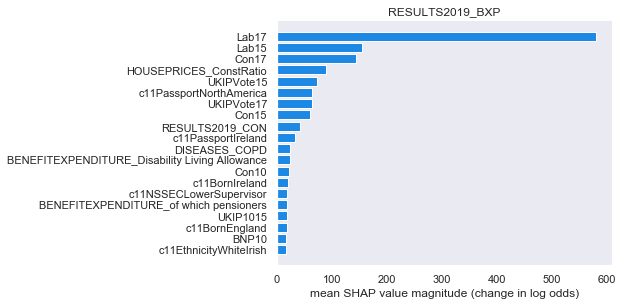

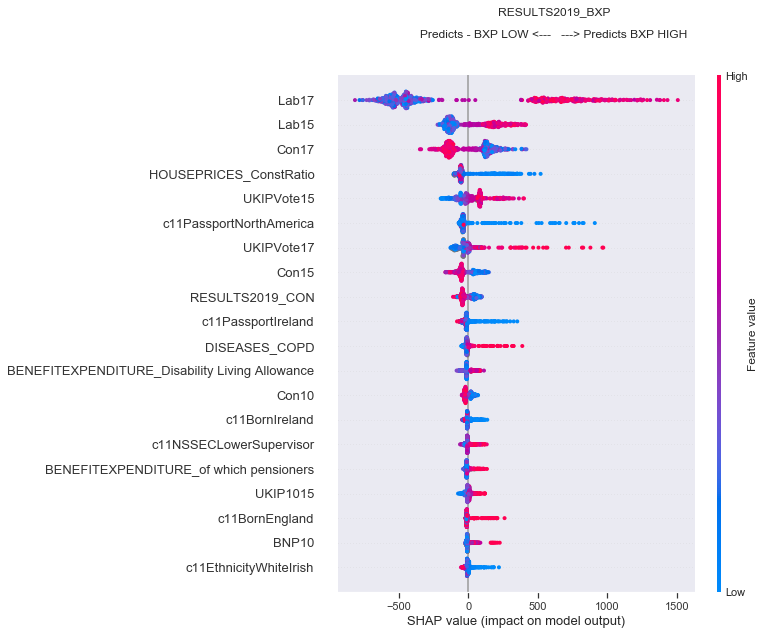

(<shap.explainers.tree.TreeExplainer at 0x1bbcde10>,
 array([[-8.8319182e-01,  1.9000670e+02,  8.0217120e+02, ...,
          9.3189907e-01, -1.3279621e+01,  0.0000000e+00],
        [-3.2965684e-01, -3.0432632e+01, -3.7989804e+02, ...,
         -4.3071353e-01, -8.7045193e+00,  0.0000000e+00],
        [-5.2251017e-01,  2.7479636e+02, -4.0113788e+02, ...,
         -6.7959213e-01, -1.2365646e+00,  0.0000000e+00],
        ...,
        [ 9.2815679e-01,  1.3795009e+02,  5.8027234e+02, ...,
          2.5881338e+00,  2.6846535e+00,  0.0000000e+00],
        [ 4.9850065e-01, -1.3437296e+02, -4.5896356e+02, ...,
          1.7016143e+00,  1.2807213e+00,  0.0000000e+00],
        [ 4.4555575e-01, -1.7869901e+02, -7.1054242e+02, ...,
          2.2509868e+00,  5.4588449e-01,  0.0000000e+00]], dtype=float32))

In [59]:
Treatment = "xgboost_RESULTS2019_BXP"
var_stub = "RESULTS2019_BXP"
global var_list
var_list = ["RESULTS2019_BXP"]

var_stub_list = [var_stub, "RESULTS2019_BXP"]

# mask = BES_cens["RESULTS2019_BXP"]!=0.0

optional_mask = False
sample_wts = False
drop_other_waves = False

# Leavers only
# def optional_mask_fn(wave=[]):
#     return 1
#     return BES_cens["RESULTS2019_BXP"]!=0.0
#(BES_Panel["profile_eurefvote"]=="Leave the EU")
BES_cens = BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]].copy()
# BES_cens = panoBES.copy()
BES_cens.columns = [x.replace("<","LT") for x in BES_cens.columns]
BES_cens["RESULTS2019_BXP"].replace("0.0",np.nan,inplace=True)

colname = "RESULTS2019_BXP"
# BES_cens = BES_cens_base[fertility_columns+age_columns+["leaveHanretty"]+["c11Degree"]]
BES_cens.drop(search(BES_cens,"MRP").index,axis=1,inplace=True)
BES_cens.drop(["UKIP17","UKIP15","LabVote17","ConVote15","LabVote15","ConVote17","ConVote10","LabVote10"],axis=1,inplace=True)
mask = BES_cens[colname].notnull()
xgboost_run(subdir=colname,min_features = min(BES_cens.shape[1]-1,20), threshold=500,
           title = colname+"\n\nPredicts - BXP LOW <---   ---> Predicts BXP HIGH")

FOCALDATAMRP_DEC_Conservative         631
FOCALDATAMRP_DEC_Labour               631
FOCALDATAMRP_DEC_Liberal Democrats    611
FOCALDATAMRP_DEC_SNP                   59
FOCALDATAMRP_DEC_Other                321
FOCALDATAMRP_DEC_Green                495
FOCALDATAMRP_DEC_Brexit Party         275
FOCALDATAMRP_DEC_Plaid Cymru           36
YOUGOVMRP_DEC_Con                     632
YOUGOVMRP_DEC_Lab                     632
YOUGOVMRP_DEC_LD                      632
YOUGOVMRP_DEC_Brexit                  632
YOUGOVMRP_DEC_Green                   632
YOUGOVMRP_DEC_SNP                     632
YOUGOVMRP_DEC_PC                      632
YOUGOVMRP_DEC_Other                   632
YOUGOVMRP_NOV_Con                     632
YOUGOVMRP_NOV_Lab                     632
YOUGOVMRP_NOV_LD                      632
YOUGOVMRP_NOV_Brexit                  632
YOUGOVMRP_NOV_Green                   632
YOUGOVMRP_NOV_SNP                     632
YOUGOVMRP_NOV_PC                      632
YOUGOVMRP_NOV_Other               

In [22]:
BES_cens.columns

Index(['pano', 'Con17', 'Lab17', 'LD17', 'SNP17', 'PC17', 'UKIP17', 'Green17',
       'Other17', 'Majority17',
       ...
       'RESULTS2019_LAB', 'RESULTS2019_LIBDEM', 'RESULTS2019_GRN',
       'RESULTS2019_SNP', 'RESULTS2019_PC', 'RESULTS2019_BXP',
       'RESULTS2019_UKIP', 'RESULTS2019_OTHER',
       'RESULTS2019_Registered Voters', 'RESULTS2019_Turnout'],
      dtype='object', length=494)

In [27]:
mask = BES_cens["RESULTS2019_BXP"]!=0.0
mask.sum()

275

In [30]:
BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]]

,pano,Con17,Lab17,LD17,SNP17,PC17,UKIP17,Green17,Other17,Majority17,...,RESULTS2019_LAB,RESULTS2019_LIBDEM,RESULTS2019_GRN,RESULTS2019_SNP,RESULTS2019_PC,RESULTS2019_BXP,RESULTS2019_UKIP,RESULTS2019_OTHER,RESULTS2019_Registered Voters,RESULTS2019_Turnout
0,1,17.737766,68.119514,1.800529,NaN,8.299267,4.042924,NaN,NaN,50.381748,...,17008.0,1072.0,450.0,0.0,2711.0,3108.0,0.0,731,50747,62.27
1,2,44.594090,42.618974,2.926905,NaN,9.860031,NaN,NaN,NaN,1.975117,...,12653.0,1821.0,0.0,0.0,2704.0,0.0,0.0,0,44699,71.29
2,3,22.692276,30.010610,4.605925,41.271050,NaN,NaN,NaN,1.420138e+00,11.260440,...,4939.0,2846.0,880.0,20205.0,0.0,1008.0,0.0,0,62489,59.87
3,4,42.132470,20.549300,5.866091,31.452139,NaN,NaN,NaN,NaN,10.680332,...,3834.0,5018.0,0.0,20388.0,0.0,0.0,0.0,0,65719,69.44
4,5,47.852785,11.052785,8.641162,32.453269,NaN,NaN,NaN,NaN,15.399516,...,2431.0,6253.0,0.0,21909.0,0.0,0.0,0.0,0,72640,73.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,646,54.489597,12.487375,29.705070,NaN,NaN,NaN,1.770925,1.547034e+00,24.784526,...,3761.0,18407.0,1629.0,0.0,0.0,0.0,0.0,875,82468,71.86
628,647,27.789226,41.863141,1.281880,NaN,27.395831,1.669923,NaN,1.421085e-14,14.073915,...,10991.0,0.0,0.0,0.0,10418.0,2184.0,0.0,0,51925,70.39
629,648,30.174427,65.163502,4.662071,NaN,NaN,NaN,NaN,NaN,34.989075,...,27312.0,4149.0,2107.0,0.0,0.0,1479.0,0.0,691,74801,66.18
630,649,51.118812,36.684835,10.291326,NaN,NaN,NaN,1.905027,NaN,14.433977,...,17339.0,9992.0,0.0,0.0,0.0,0.0,0.0,692,74673,74.12


In [35]:
pattern = "RESULTS2019_BXP"
name = "RESULTS2019_BXP"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]][mask], name, corr_type,
                                 min_sample_size = 100)
display_corr(df, name, corr_type)


,r,p,N
YOUGOVMRP_DEC_Brexit,0.91,0.00,275
YOUGOVMRP_NOV_Brexit,0.89,0.00,275
UKIP15,0.82,0.00,271
UKIP1015,0.81,0.00,271
DISEASES_COPD,0.81,0.00,228
FOCALDATAMRP_DEC_Brexit Party,0.8,0.00,275
UKIP17,0.79,0.00,174
UKIPVote15,0.79,0.00,271
UKIPVote17,0.77,0.00,174
c11HealthFair,0.76,0.00,275


In [38]:
search(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]],"age")

c11Age0to4                                                                             632
c11Age5to7                                                                             632
c11Age8to9                                                                             632
c11Age10to14                                                                           632
c11Age15                                                                               632
c11Age16to17                                                                           632
c11Age18to19                                                                           632
c11Age20to24                                                                           632
c11Age25to29                                                                           632
c11Age30to44                                                                           632
c11Age45to59                                                                           632

In [ ]:
pattern = "RESULTS2019_CON"
name = "RESULTS2019_CON"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]], name, corr_type)
display_corr(df, name, corr_type)


In [217]:
pattern = "RESULTS2019_CON"
name = "RESULTS2019_CON"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]], name, corr_type)
display_corr(df, name, corr_type)


,r,p,N
ConVote17,0.98,0.00,631
Con17,0.95,0.00,631
FOCALDATAMRP_DEC_Conservative,0.93,0.00,631
YOUGOVMRP_DEC_Con,0.93,0.00,631
YOUGOVMRP_NOV_Con,0.93,0.00,631
ConVote10,0.92,0.00,631
ConVote15,0.92,0.00,631
Con15,0.89,0.00,630
Con10,0.89,0.00,631
BENEFITEXPENDITURE_State Pension,0.81,0.00,628


In [147]:
BES_census_data[[x for x in BES_census_data.columns if "RESULTS2019" in x]] = BES_census_data[[x for x in BES_census_data.columns if "RESULTS2019" in x]].astype('float')

In [149]:
BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]]

,pano,Con17,Lab17,LD17,SNP17,PC17,UKIP17,Green17,Other17,Majority17,...,RESULTS2019_CON,RESULTS2019_LAB,RESULTS2019_LIBDEM,RESULTS2019_GRN,RESULTS2019_SNP,RESULTS2019_PC,RESULTS2019_BXP,RESULTS2019_UKIP,RESULTS2019_OTHER,RESULTS2019_Reported Turnout
0,1,17.737766,68.119514,1.800529,NaN,8.299267,4.042924,NaN,NaN,50.381748,...,6518.0,17008.0,1072.0,450.0,NaN,2711.0,3108.0,NaN,731.0,NaN
1,2,44.594090,42.618974,2.926905,NaN,9.860031,NaN,NaN,NaN,1.975117,...,14687.0,12653.0,1821.0,NaN,NaN,2704.0,NaN,NaN,0.0,NaN
2,3,22.692276,30.010610,4.605925,41.271050,NaN,NaN,NaN,1.420138e+00,11.260440,...,7535.0,4939.0,2846.0,880.0,20205.0,NaN,1008.0,NaN,0.0,NaN
3,4,42.132470,20.549300,5.866091,31.452139,NaN,NaN,NaN,NaN,10.680332,...,16398.0,3834.0,5018.0,NaN,20388.0,NaN,NaN,NaN,0.0,NaN
4,5,47.852785,11.052785,8.641162,32.453269,NaN,NaN,NaN,NaN,15.399516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,646,54.489597,12.487375,29.705070,NaN,NaN,NaN,1.770925,1.547034e+00,24.784526,...,34588.0,3761.0,18407.0,1629.0,NaN,NaN,NaN,NaN,875.0,71.9
628,647,27.789226,41.863141,1.281880,NaN,27.395831,1.669923,NaN,1.421085e-14,14.073915,...,12959.0,10991.0,NaN,NaN,NaN,10418.0,2184.0,NaN,0.0,NaN
629,648,30.174427,65.163502,4.662071,NaN,NaN,NaN,NaN,NaN,34.989075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,649,51.118812,36.684835,10.291326,NaN,NaN,NaN,1.905027,NaN,14.433977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# https://cran.r-project.org/web/packages/parlitools/parlitools.pdf

# We need a pcon-pano-ons key list
pano_pcon_ons = pd.read_csv(BES_small_data_files + "pano_pcon_ons"+".csv",encoding='iso-8859-1')  
fn = BES_data_folder+"parliamentary constituency data"+os.sep+"BES_constituency_aggregates.csv"
panoBES = pd.read_csv(fn)
keys = pano_pcon_ons.set_index('pano').loc[panoBES["panoW16"].astype('int')].reset_index()
panoBES[keys.columns] = keys
panoBES.drop(["panoW16","pcon"],axis=1,inplace=True)

In [36]:
panoBES.to_csv(BES_data_folder+"parliamentary constituency data"+os.sep+"BES_constituency_aggregates.csv")

In [107]:
fn = BES_data_folder+"parliamentary constituency data"+os.sep+"Lots of aggregated parliamentary data.csv"
BES_census_data.to_csv(fn)
# drop("LAB1719",axis=1)

In [ ]:
### Still not 100% sure what the best focus of analysis should be here
### Looks like it should be Labour Raw Vote 17-19 shift

In [138]:
Treatment = "BES_census_data_PCA"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


df = BES_census_data.select_dtypes('number').drop("pano",axis=1).copy()
# mask = (BES_Panel["country"]=="England")
# df = df[mask]
df = df.apply(lambda x: x.fillna(x.mean()))

df_cols = df.columns
df_ind = df.index

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Wall time: 10.8 s


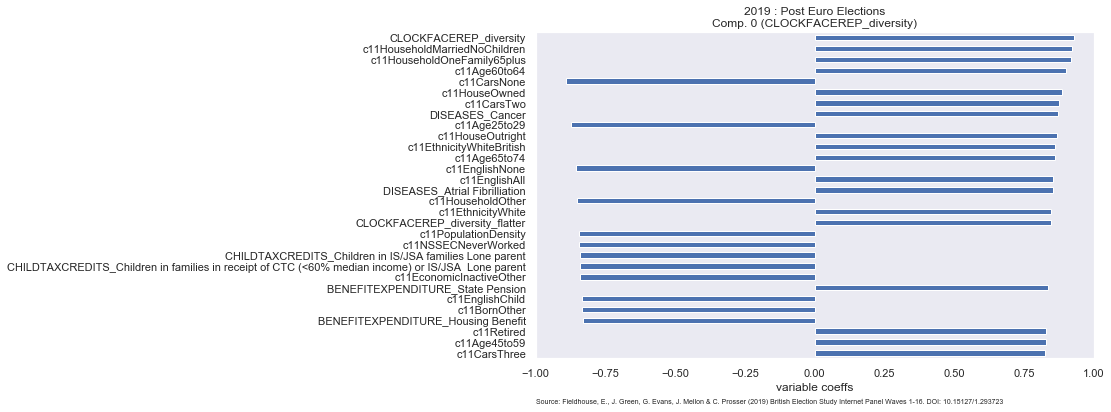

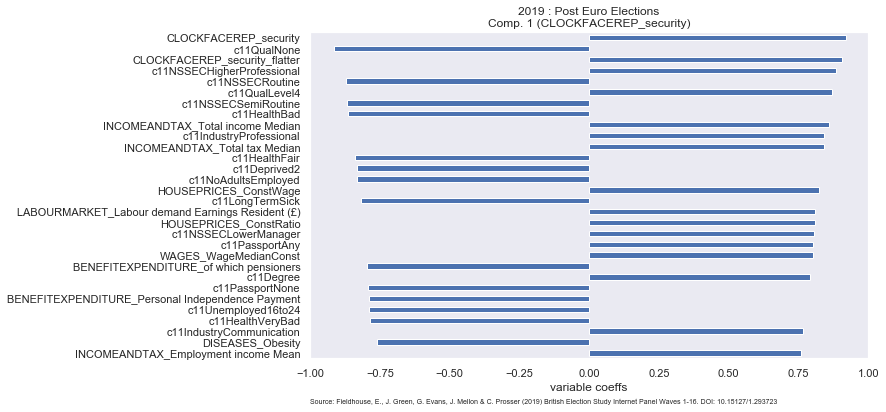

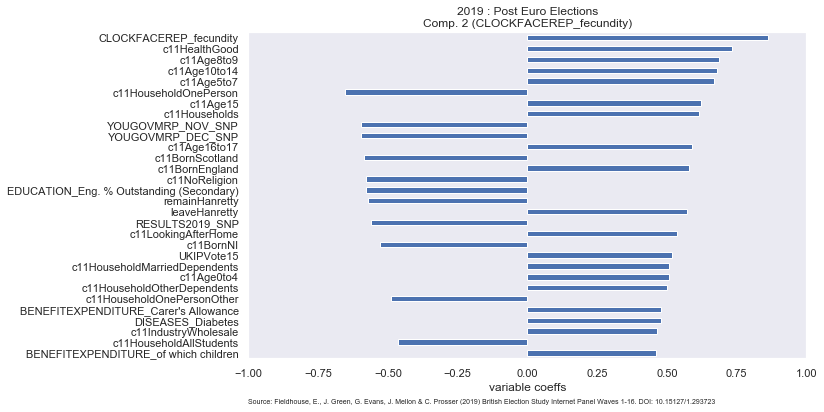

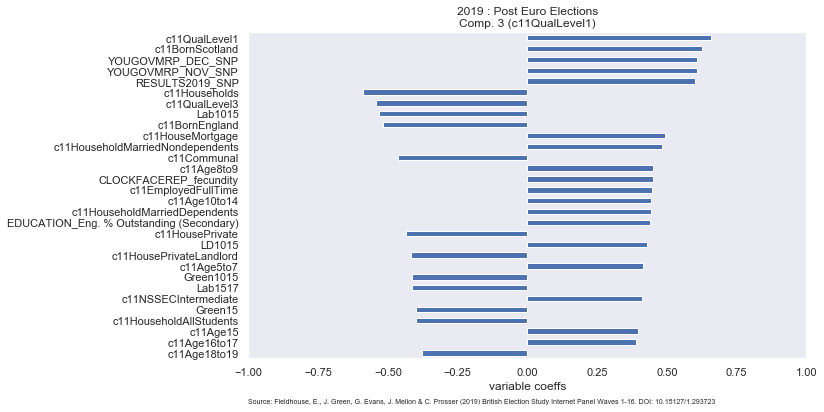

In [141]:
%%time
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [149]:
[comp_dict[k].loc["leaveHanretty","components_"] for k in comp_dict.keys()]

## weird - leaveHanretty most significant on *third* factor (albeit very close on second)

[0.4170480699347976,
 -0.5325008666951402,
 0.5724801547617251,
 -0.1396156777264674,
 -0.06680775115373609,
 -0.03705338093561104,
 0.18901397727105926,
 0.24904371123173552,
 -0.12107680599170531,
 -0.009312849537857267,
 -0.04597483906858713,
 -0.007578726333927669,
 -0.06642102389440062,
 -0.10980827525929009,
 -0.014102884165575223,
 -0.05550179289145383,
 0.10858316699986152,
 -0.00044111157438984303,
 -0.07139438757345755,
 -0.00012621889141331178]

In [ ]:
### now add in electoral variables

In [150]:
Electoral_vars

,CON_perc_2019,LAB_perc_2019,LIBDEM_perc_2019,LD_LAB_perc_2019,CON_perc_2017,LAB_perc_2017,LIBDEM_perc_2017,LD_LAB_perc_2017,CON_v_LDLAB_swing,CON1719,LD1719,LAB1719,GRN1719,UKIP_BXP19,UKIP_BXP1719,UKIP_BXP1519,LAB_TO_CON,CON_TO_LAB
ONSConstID,,,,,,,,,,,,,,,,,,
W07000049,0.128441,0.335153,0.021124,0.356277,17.737766,68.119514,1.800529,69.920043,25.977221,617.0,473.0,-5654.0,NaN,3108.0,1763.0,-1863.0,False,False
W07000058,0.328576,0.283071,0.040739,0.323810,44.594090,42.618974,2.926905,45.545879,0.478277,350.0,880.0,-1049.0,NaN,0.0,NaN,-3467.0,False,False
S14000001,0.120581,0.079038,0.045544,0.124582,22.692276,30.010610,4.605925,34.616536,5.960129,-806.0,1153.0,-6092.0,NaN,1008.0,NaN,NaN,False,False
S14000002,0.249517,0.058339,0.076355,0.134695,42.132470,20.549300,5.866091,26.415391,-7.801128,-2348.0,2408.0,-5309.0,NaN,0.0,NaN,-897.0,False,False
S14000058,0.313216,0.033466,0.086082,0.119548,47.852785,11.052785,8.641162,19.693947,-13.982585,-1952.0,1792.0,-3275.0,NaN,0.0,NaN,-1006.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E14001060,0.419411,0.045606,0.223202,0.268807,54.489597,12.487375,29.705070,42.192445,-6.073274,2219.0,761.0,-3657.0,577.0,0.0,NaN,-7646.0,False,False
W07000041,0.249571,0.211671,0.000000,0.211671,27.789226,41.863141,1.281880,43.145021,7.696848,2575.0,-479.0,-4652.0,NaN,2184.0,1560.0,-2937.0,False,False
E14001061,0.184048,0.365129,0.055467,0.420596,30.174427,65.163502,4.662071,69.825573,19.707299,-2252.0,1674.0,-7282.0,NaN,1479.0,NaN,-3316.0,False,False


In [172]:
Treatment = "BES_census_data_PCA_plus_electoral_variables"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


df = BES_census_data.select_dtypes('number').drop("pano",axis=1).copy()
# mask = (BES_Panel["country"]=="England")
# df = df[mask]
df[Electoral_vars.columns]  =Electoral_vars.set_index(BES_census_data.index)
df = df.apply(lambda x: x.fillna(x.mean()))

df_cols = df.columns
df_ind = df.index

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Wall time: 11.3 s


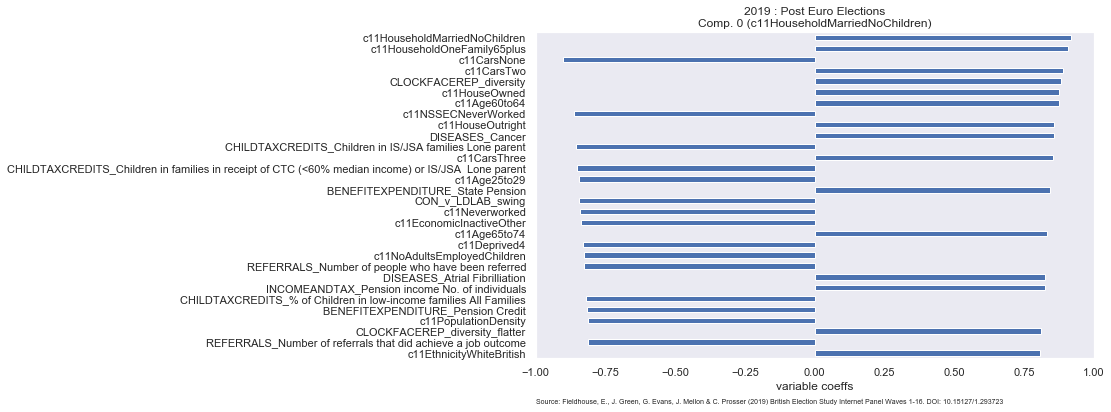

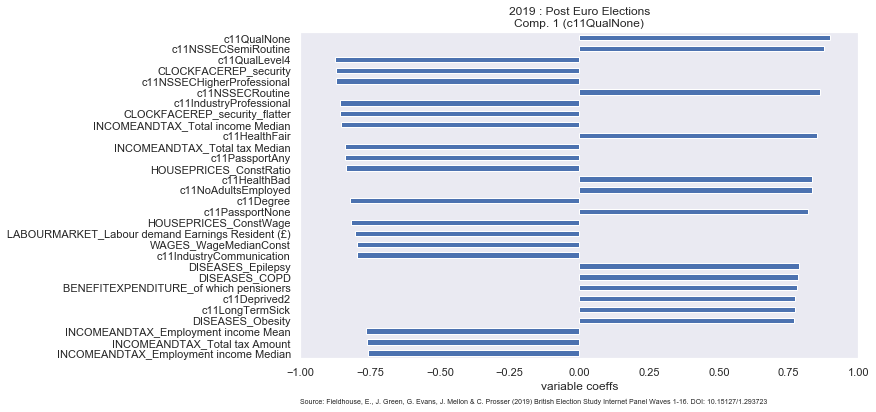

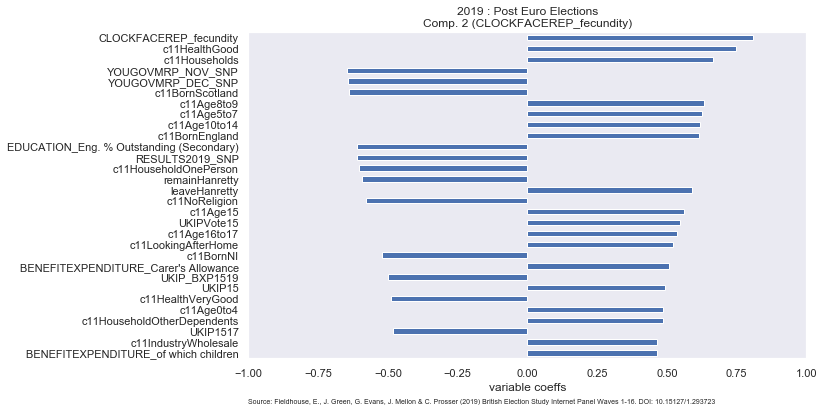

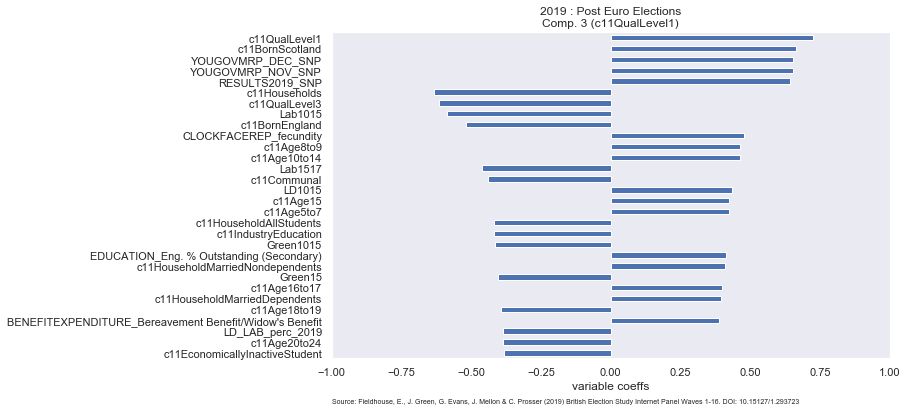

In [173]:
%%time
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [178]:
Treatment = "panoBES_PCA"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


df = panoBES.select_dtypes('number').drop("pano",axis=1).copy()
# mask = (BES_Panel["country"]=="England")
# df = df[mask]
# df[Electoral_vars.columns]  =Electoral_vars.set_index(BES_census_data.index)
df = df.apply(lambda x: x.fillna(x.mean()))

df_cols = df.columns
df_ind = df.index

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


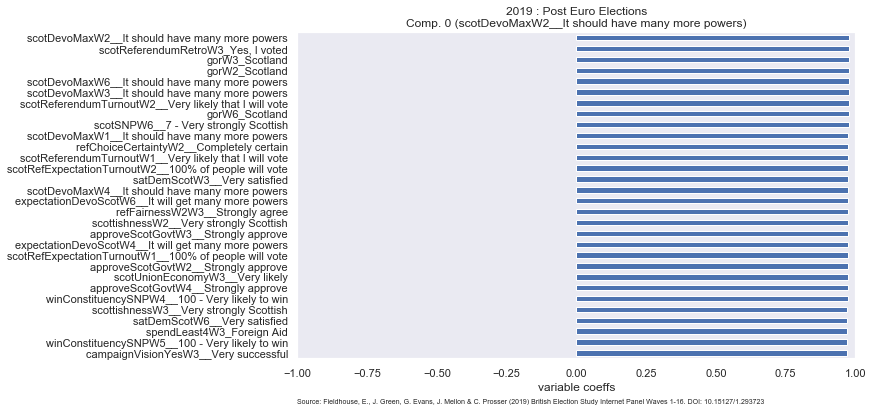

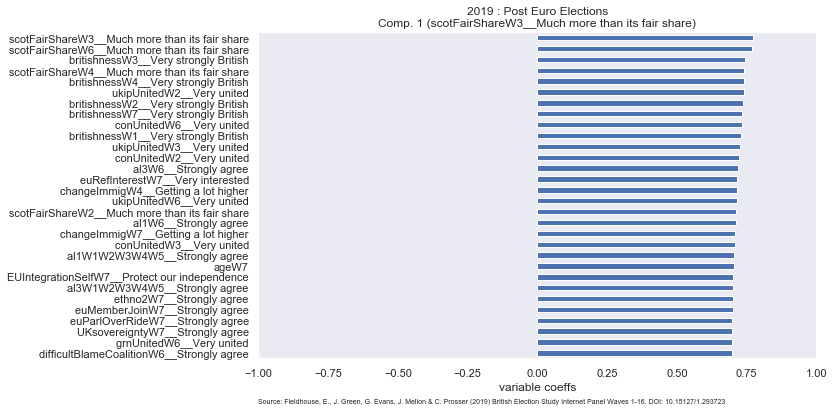

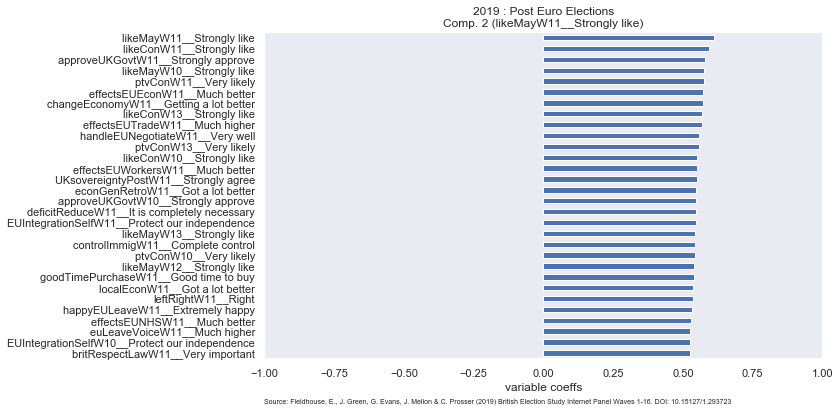

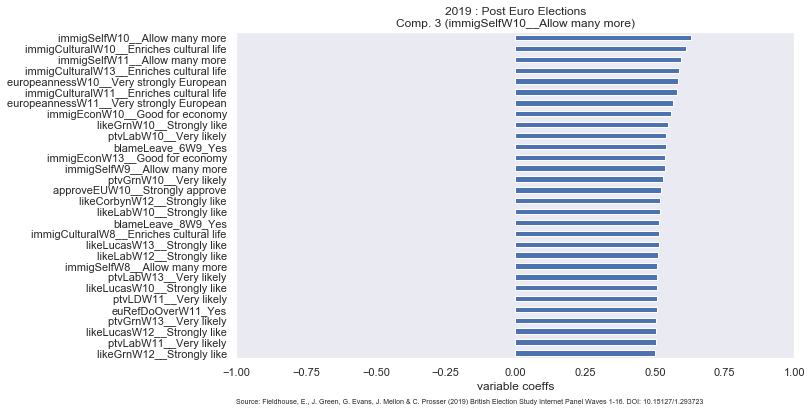

In [193]:
# %%time
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
n_components=4
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 


X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,min(n_components,len(df_ind))),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [200]:
Treatment = "panoBES_PCA_plus_electoral_variables"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


df = panoBES.select_dtypes('number').drop("pano",axis=1).copy()
# mask = (BES_Panel["country"]=="England")
# df = df[mask]
df[Electoral_vars.columns]  =Electoral_vars.set_index(panoBES.index)
df = df.apply(lambda x: x.fillna(x.mean()))

df_cols = df.columns
df_ind = df.index

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


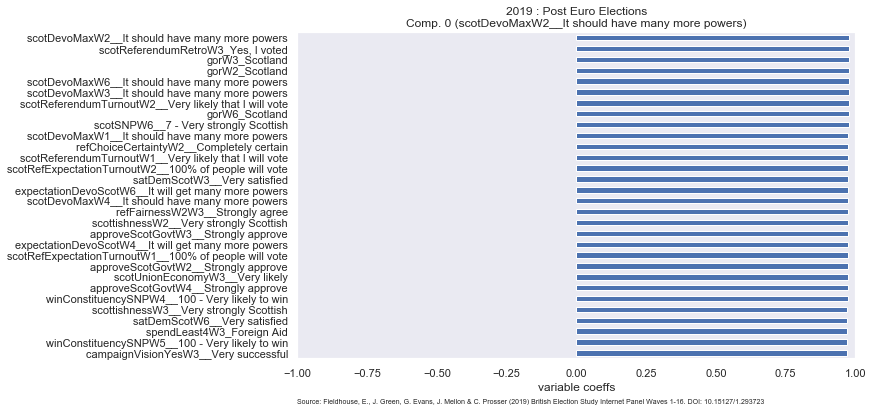

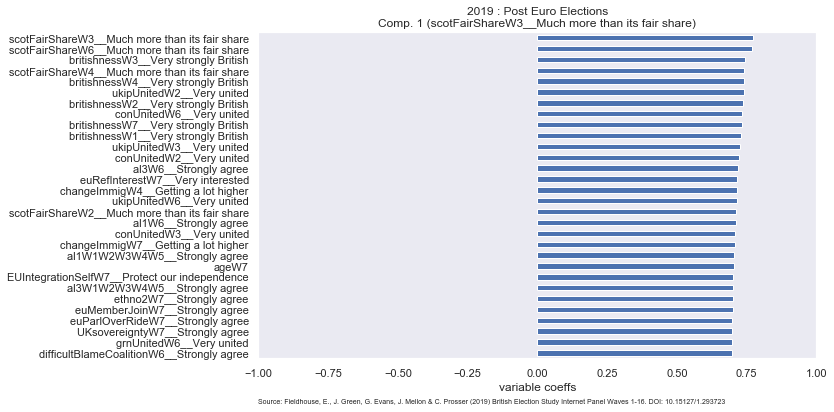

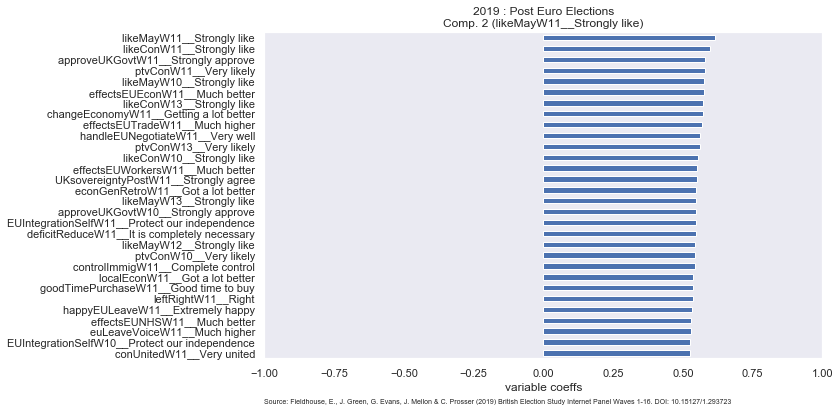

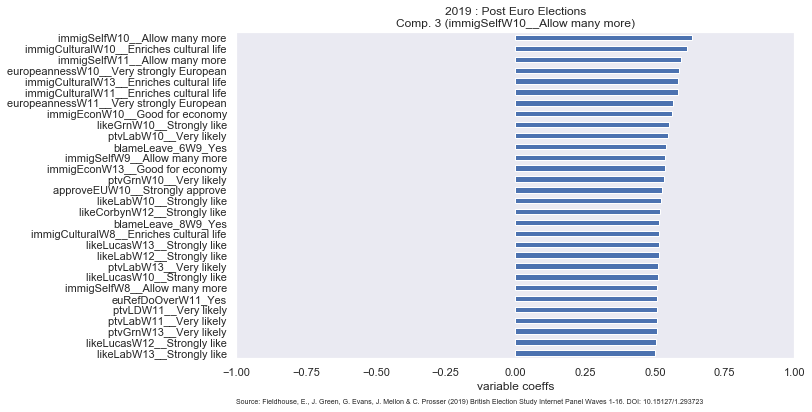

In [201]:
# %%time
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
n_components=4
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 


X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,min(n_components,len(df_ind))),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [204]:
Treatment = "panoBES_plus_BES_census_data_PCA_plus_electoral_variables"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


df = panoBES.select_dtypes('number').drop("pano",axis=1).copy()
# mask = (BES_Panel["country"]=="England")
# df = df[mask]
df[Electoral_vars.columns]  =Electoral_vars.set_index(panoBES.index)
df[BES_census_data.columns]  =BES_census_data.set_index(panoBES.index)
df = df.select_dtypes('number')
df = df.apply(lambda x: x.fillna(x.mean()))

df_cols = df.columns
df_ind = df.index

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


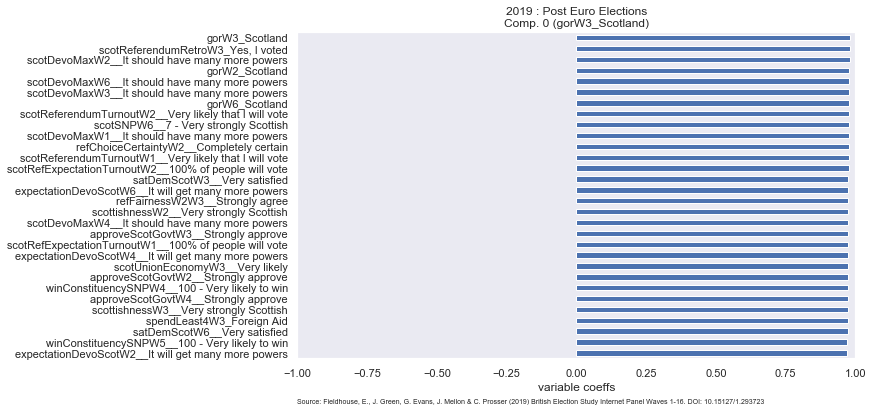

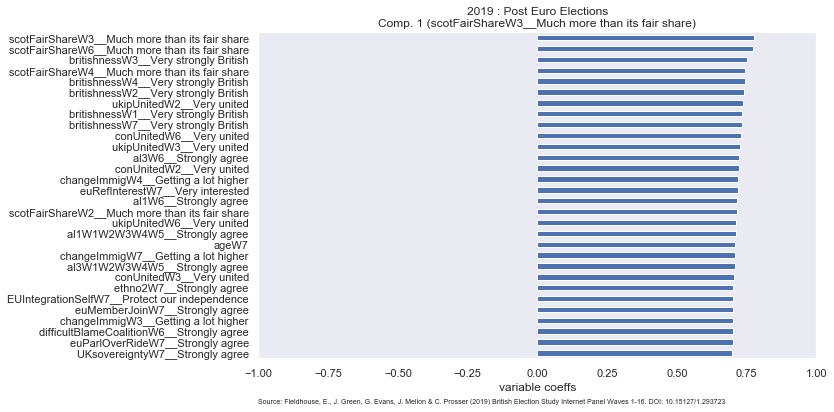

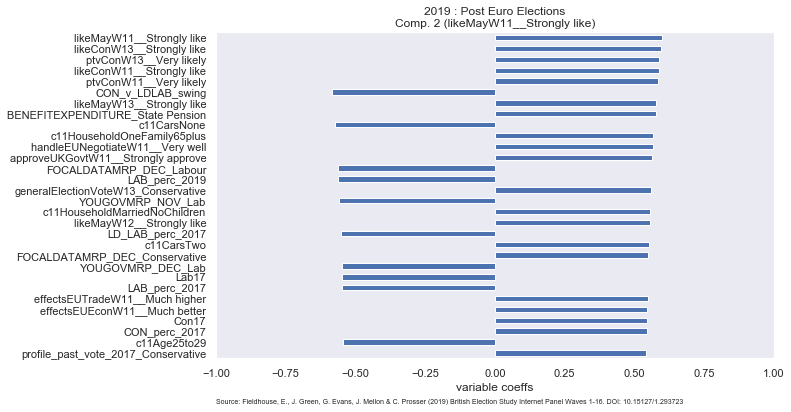

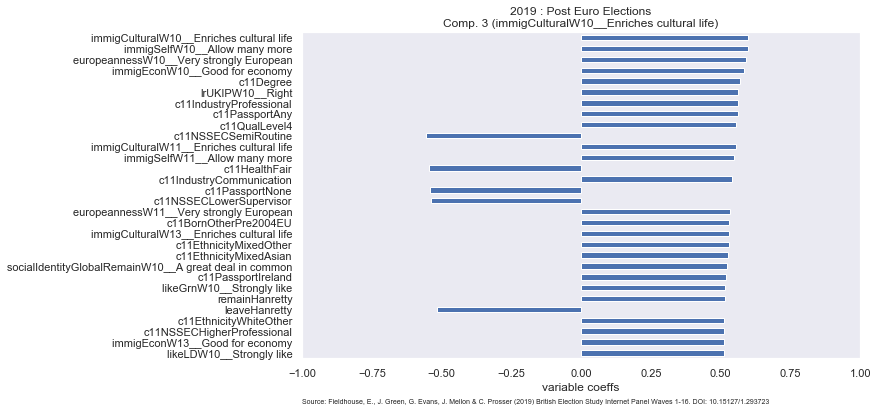

In [205]:
# %%time
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
n_components=4
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 


X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,min(n_components,len(df_ind))),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [208]:
search(BES_census_data,"STAMPDUTY")

STAMPDUTY_Residential Number of transactions           533
STAMPDUTY_Residential Estimated Property Value         533
STAMPDUTY_Residential Receipts                         533
STAMPDUTY_Non-residential Number of transactions       532
STAMPDUTY_Non-residential  Estimated Property Value    533
STAMPDUTY_Non-residential Receipts                     533
STAMPDUTY_All property Number of transactions          533
STAMPDUTY_All property Estimated Property Value        533
STAMPDUTY_All property Receipts                        533
dtype: int64

In [215]:
var1 = "STAMPDUTY_All property Estimated Property Value"
ser1 =BES_census_data[var1]
var2 = "LAB1719"
ser2 = Electoral_vars[var2]
ser2.index = ser1.index
# pd.crosstab(ser1,ser2)

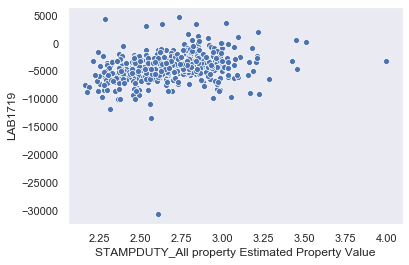

In [218]:
sns.scatterplot(ser1.apply(lambda x: np.log10(x)),ser2)

In [ ]:
########################################################################
# load England&Wales 2011 Census Data

In [10]:
Nomis_folder = create_subdir(BES_data_folder,"Nomis")
full2011Census = pd.read_csv(Nomis_folder+"2011ONS_England&Wales_by_parlcon"+".csv",index_col = "Unnamed: 0")

In [11]:
full2011Census

,Usual resident population:Total|All usual residents,Usual resident population:Total|Males,Usual resident population:Total|Females,Usual resident population:Total|Lives in a household,Usual resident population:Total|Lives in a communal establishment,Usual resident population:Total|Schoolchild or full-time student aged 4 and over at their non term-time address,Usual resident population:Total|Area (Hectares),Usual resident population:Total|Density (number of persons per hectare),Usual resident population:Urban (total)|All usual residents,Usual resident population:Urban (total)|Males,...,Approximated Social Grade (Workday population):AB Higher and intermediate managerial/administrative/professional occupations,"Approximated Social Grade (Workday population):C1 Supervisory, clerical and junior managerial/administrative/professional occupations",Approximated Social Grade (Workday population):C2 Skilled manual occupations,Approximated Social Grade (Workday population):DE Semi-skilled and unskilled manual occupations; unemployed and lowest grade occupations,Length of residence in the UK:All categories: Length of residence in the UK,Length of residence in the UK:Born in the UK,Length of residence in the UK:Resident in UK: Less than 2 years,Length of residence in the UK:Resident in UK: 2 years or more but less than 5 years,Length of residence in the UK:Resident in UK: 5 years or more but less than 10 years,Length of residence in the UK:Resident in UK: 10 years or more
E14000530,52011.0,25952.95,26058.05,50995.50,1015.50,1180.0,5298.18,19.6,NaN,NaN,...,18581,20213,14525,11808,100809,84664,2357,3556,3582,6650
E14000531,38537.0,18855.95,19681.05,38315.70,221.30,765.0,4402.67,17.5,NaN,NaN,...,6721,9648,11091,10196,67695,64320,265,418,660,2032
E14000532,48345.5,23643.95,24701.55,48033.70,311.80,2029.0,5162.73,18.7,NaN,NaN,...,16846,16615,9435,9153,87994,80100,703,1139,1614,4438
E14000533,43991.5,21651.10,22340.40,43602.05,389.45,729.0,12463.57,7.1,NaN,NaN,...,8922,14410,15367,17882,88174,85070,271,586,708,1539
E14000534,48683.5,23369.00,25314.50,47878.65,804.85,1838.0,64523.47,1.5,NaN,NaN,...,12730,14161,11500,8139,86569,80037,591,832,1084,4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W07000076,43540.0,21309.45,22230.55,43342.75,197.25,770.0,11454.49,7.6,NaN,NaN,...,7295,12814,11817,15631,78851,76603,168,323,448,1309
W07000077,37754.0,18560.10,19193.90,37488.65,265.35,558.0,11201.25,6.7,NaN,NaN,...,5832,9466,10437,14334,67397,65792,141,220,319,925
W07000078,48916.5,23871.40,25045.10,48102.65,813.85,1365.0,31513.63,3.1,NaN,NaN,...,9835,15288,12301,12831,87134,83190,534,443,681,2286
W07000079,45563.5,22150.80,23412.70,44956.35,607.15,1105.0,5094.46,17.9,NaN,NaN,...,11003,14870,9627,13926,81367,73639,1036,1345,1571,3776


In [15]:
Electoral_vars

,CON_perc_2019,LAB_perc_2019,LIBDEM_perc_2019,LD_LAB_perc_2019,CON_perc_2017,LAB_perc_2017,LIBDEM_perc_2017,LD_LAB_perc_2017,CON_v_LDLAB_swing,CON1719,LD1719,LAB1719,GRN1719,UKIP_BXP19,UKIP_BXP1719,UKIP_BXP1519,LAB_TO_CON,CON_TO_LAB
ONSConstID,,,,,,,,,,,,,,,,,,
W07000049,0.128441,0.335153,0.021124,0.356277,17.737766,68.119514,1.800529,69.920043,25.977221,617.0,473.0,-5654.0,NaN,3108.0,1763.0,-1863.0,False,False
W07000058,0.328576,0.283071,0.040739,0.323810,44.594090,42.618974,2.926905,45.545879,0.478277,350.0,880.0,-1049.0,NaN,0.0,NaN,-3467.0,False,False
S14000001,0.120581,0.079038,0.045544,0.124582,22.692276,30.010610,4.605925,34.616536,5.960129,-806.0,1153.0,-6092.0,NaN,1008.0,NaN,NaN,False,False
S14000002,0.249517,0.058339,0.076355,0.134695,42.132470,20.549300,5.866091,26.415391,-7.801128,-2348.0,2408.0,-5309.0,NaN,0.0,NaN,-897.0,False,False
S14000058,0.313216,0.033466,0.086082,0.119548,47.852785,11.052785,8.641162,19.693947,-13.982585,-1952.0,1792.0,-3275.0,NaN,0.0,NaN,-1006.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E14001060,0.419411,0.045606,0.223202,0.268807,54.489597,12.487375,29.705070,42.192445,-6.073274,2219.0,761.0,-3657.0,577.0,0.0,NaN,-7646.0,False,False
W07000041,0.249571,0.211671,0.000000,0.211671,27.789226,41.863141,1.281880,43.145021,7.696848,2575.0,-479.0,-4652.0,NaN,2184.0,1560.0,-2937.0,False,False
E14001061,0.184048,0.365129,0.055467,0.420596,30.174427,65.163502,4.662071,69.825573,19.707299,-2252.0,1674.0,-7282.0,NaN,1479.0,NaN,-3316.0,False,False


In [39]:
full2011Census.drop(focal_var,axis=1,inplace=True)

In [29]:
focal_var = "LAB1719"

full2011Census[focal_var] = Electoral_vars.loc[full2011Census.index , focal_var]

pattern = focal_var
name = focal_var
corr_type = "spearman"
df,corr_type = make_corr_summary(full2011Census,
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type,text_wrap_length=200)
full2011Census.drop(focal_var,axis=1,inplace=True)

,r,p,N
Ethnic group by religion:White: English/Welsh/Scottish/Northern Irish/British|Buddhist,0.45,0.00,572
Ethnic group by religion:White: Total|Buddhist,0.44,0.00,572
Occupancy rating (bedrooms) by household composition:Occupancy rating (bedrooms) of +2 or more|Other household types: Other (including all full-time students and all aged 65 and over),0.42,0.00,572
Country of birth by religion by sex:Females|Europe: United Kingdom: Total|Buddhist,0.41,0.00,572
Country of birth:Europe: Channel Islands and Isle of Man,0.41,0.00,572
Occupancy rating (bedrooms) by household composition:Occupancy rating (bedrooms) of +2 or more|Other household types: Total,0.41,0.00,572
Country of birth by religion by sex:Females|Europe: Total|Buddhist,0.41,0.00,572
Country of birth by religion by sex:All persons|Europe: Total|Buddhist,0.4,0.00,572
Tenure by number of persons per bedroom in household by household type:All categories: Tenure|Up to 0.5 persons per bedroom|Multi-person household,0.4,0.00,572
Country of birth by religion by sex:All persons|Europe: United Kingdom: Total|Buddhist,0.4,0.00,572


In [32]:
focal_var = "CON1719"

full2011Census[focal_var] = Electoral_vars.loc[full2011Census.index , focal_var]

pattern = focal_var
name = focal_var
corr_type = "spearman"
df,corr_type = make_corr_summary(full2011Census,
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type,text_wrap_length=200)
full2011Census.drop(focal_var,axis=1,inplace=True)

,r,p,N
Highest level of qualification by family type:No qualifications|Couple family: Married or same-sex civil partnership: No children,0.6,0.00,573
Approximated social grade by sex by age:Males|C2 Skilled manual occupations|Age 55 to 64,0.59,0.00,573
Approximated social grade by sex by age:All persons|C2 Skilled manual occupations|Age 55 to 64,0.59,0.00,573
Approximated social grade by adult lifestage:C2 Skilled manual occupations|Age 55 to 64: Total,0.59,0.00,573
Approximated social grade by sex by age:Females|C2 Skilled manual occupations|Age 55 to 64,0.58,0.00,573
Proficiency in English by occupation:5. Skilled trades occupations|Main language is English (English or Welsh in Wales),0.58,0.00,573
Economic activity by passports held:Economically active: In employment: Total|No passport held,0.58,0.00,573
Approximated social grade by adult lifestage:C2 Skilled manual occupations|Age 55 to 64: Two or more person household: No dependent children,0.58,0.00,573
Highest level of qualification by passports held:Level 2 qualifications|No passport held,0.58,0.00,573
Economic activity by passports held:Economically active: In employment: Employee: Full-time (including full-time students)|No passport held,0.57,0.00,573


[0]	validation_0-rmse:4555.72
Will train until validation_0-rmse hasn't improved in 100.0 rounds.
[1]	validation_0-rmse:4371.18
[2]	validation_0-rmse:4183.71
[3]	validation_0-rmse:4025.77
[4]	validation_0-rmse:3865.57
[5]	validation_0-rmse:3719.81
[6]	validation_0-rmse:3574.65
[7]	validation_0-rmse:3443.18
[8]	validation_0-rmse:3325.53
[9]	validation_0-rmse:3211.79
[10]	validation_0-rmse:3091.27
[11]	validation_0-rmse:2991.91
[12]	validation_0-rmse:2908.25
[13]	validation_0-rmse:2817.62
[14]	validation_0-rmse:2742.08
[15]	validation_0-rmse:2661.65
[16]	validation_0-rmse:2593.17
[17]	validation_0-rmse:2524.09
[18]	validation_0-rmse:2458.59
[19]	validation_0-rmse:2401.02
[20]	validation_0-rmse:2338.5
[21]	validation_0-rmse:2278.83
[22]	validation_0-rmse:2234.08
[23]	validation_0-rmse:2190.33
[24]	validation_0-rmse:2147.1
[25]	validation_0-rmse:2108.69
[26]	validation_0-rmse:2074
[27]	validation_0-rmse:2034.76
[28]	validation_0-rmse:1994.07
[29]	validation_0-rmse:1964.64
[30]	validation_0

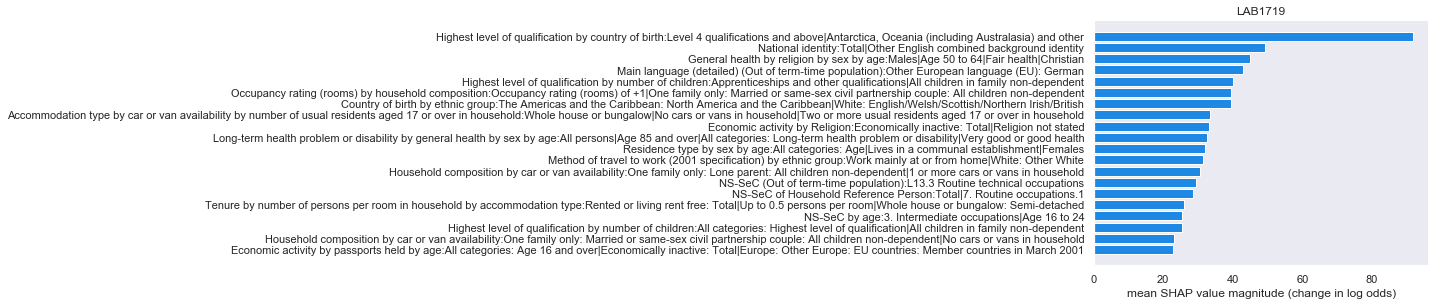

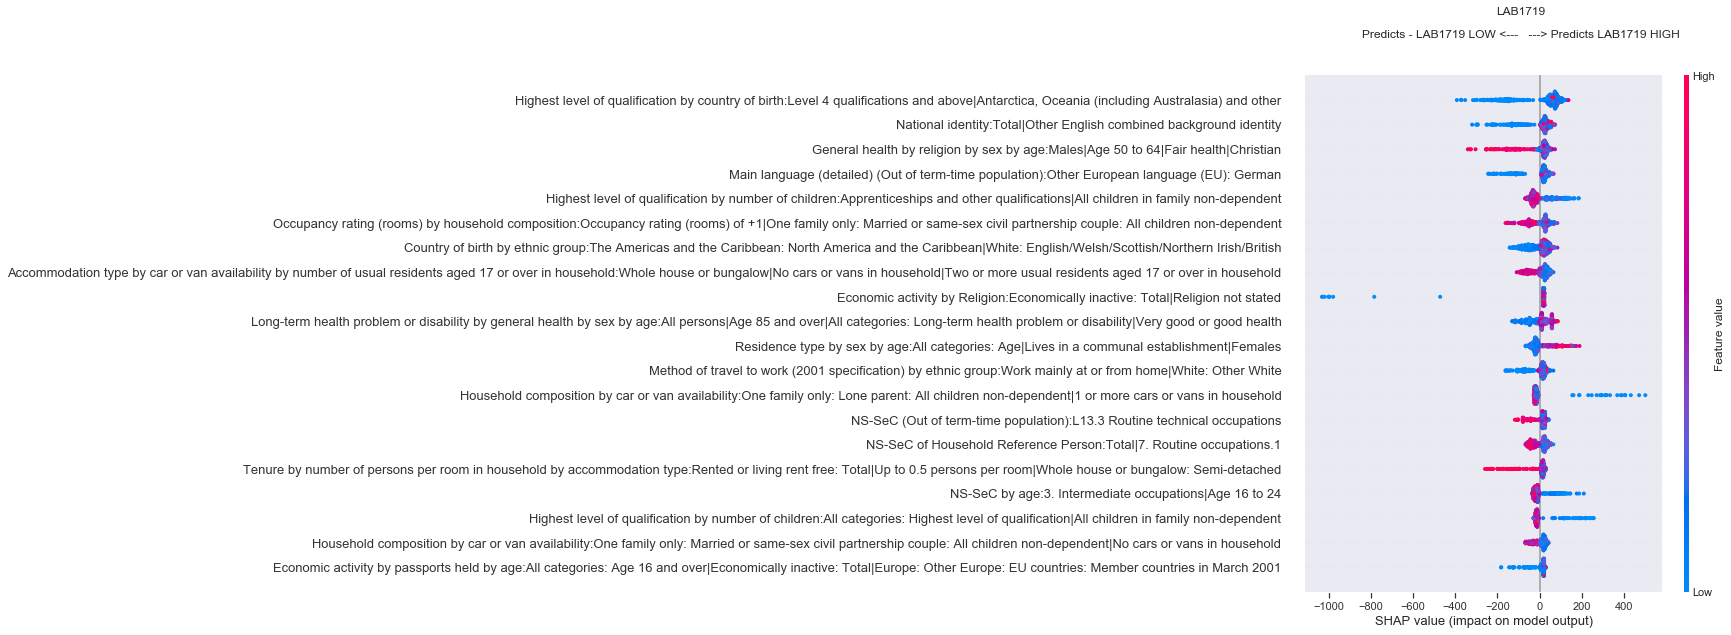

(<shap.explainers.tree.TreeExplainer at 0x1c7419b0>,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [38]:
focal_var = "LAB1719"

Treatment = "xgboost_CENSUS2011E&W_"+focal_var
var_stub = focal_var
global var_list
var_list = [focal_var]

var_stub_list = [var_stub, focal_var]

# mask = BES_cens["RESULTS2019_BXP"]!=0.0

optional_mask = False
sample_wts = False
drop_other_waves = False

# # Leavers only
# # def optional_mask_fn(wave=[]):
# #     return 1
# #     return BES_cens["RESULTS2019_BXP"]!=0.0
# #(BES_Panel["profile_eurefvote"]=="Leave the EU")
# BES_cens = BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]].copy()
# # BES_cens = panoBES.copy()
# BES_cens.columns = [x.replace("<","LT") for x in BES_cens.columns]
# BES_cens["RESULTS2019_BXP"].replace("0.0",np.nan,inplace=True)


full2011Census[focal_var] = Electoral_vars.loc[full2011Census.index , focal_var]


colname = focal_var
# BES_cens = BES_cens_base[fertility_columns+age_columns+["leaveHanretty"]+["c11Degree"]]
# BES_cens.drop(search(BES_cens,"MRP").index,axis=1,inplace=True)
# BES_cens.drop(["UKIP17","UKIP15","LabVote17","ConVote15","LabVote15","ConVote17","ConVote10","LabVote10"],axis=1,inplace=True)
mask = full2011Census[colname].notnull()
BES_cens = full2011Census[mask].copy()
xgboost_run(subdir=colname,min_features = min(BES_cens.shape[1]-1,20), threshold=500,
           title = colname+"\n\nPredicts - LAB1719 LOW <---   ---> Predicts LAB1719 HIGH")
full2011Census.drop(focal_var,axis=1,inplace=True)

[0]	validation_0-rmse:2051.54
Will train until validation_0-rmse hasn't improved in 6.800000000000001 rounds.
[1]	validation_0-rmse:2001.24
[2]	validation_0-rmse:1948.82
[3]	validation_0-rmse:1912.11
[4]	validation_0-rmse:1879.07
[5]	validation_0-rmse:1848.71
[6]	validation_0-rmse:1821.27
[7]	validation_0-rmse:1797.45
[8]	validation_0-rmse:1768.29
[9]	validation_0-rmse:1741.69
[10]	validation_0-rmse:1719.56
[11]	validation_0-rmse:1695.02
[12]	validation_0-rmse:1673.67
[13]	validation_0-rmse:1648.08
[14]	validation_0-rmse:1638
[15]	validation_0-rmse:1619.36
[16]	validation_0-rmse:1606.72
[17]	validation_0-rmse:1590.65
[18]	validation_0-rmse:1574.5
[19]	validation_0-rmse:1561.22
[20]	validation_0-rmse:1540.77
[21]	validation_0-rmse:1532.17
[22]	validation_0-rmse:1522.46
[23]	validation_0-rmse:1513.18
[24]	validation_0-rmse:1504.26
[25]	validation_0-rmse:1495.4
[26]	validation_0-rmse:1486.78
[27]	validation_0-rmse:1479.79
[28]	validation_0-rmse:1476.14
[29]	validation_0-rmse:1471.42
[30]	

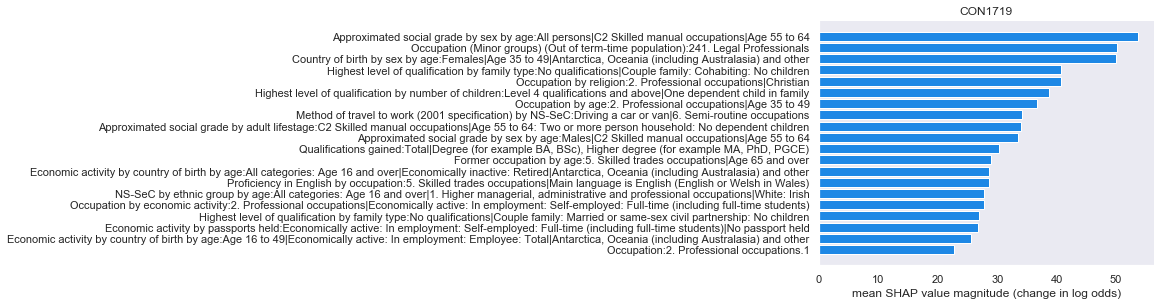

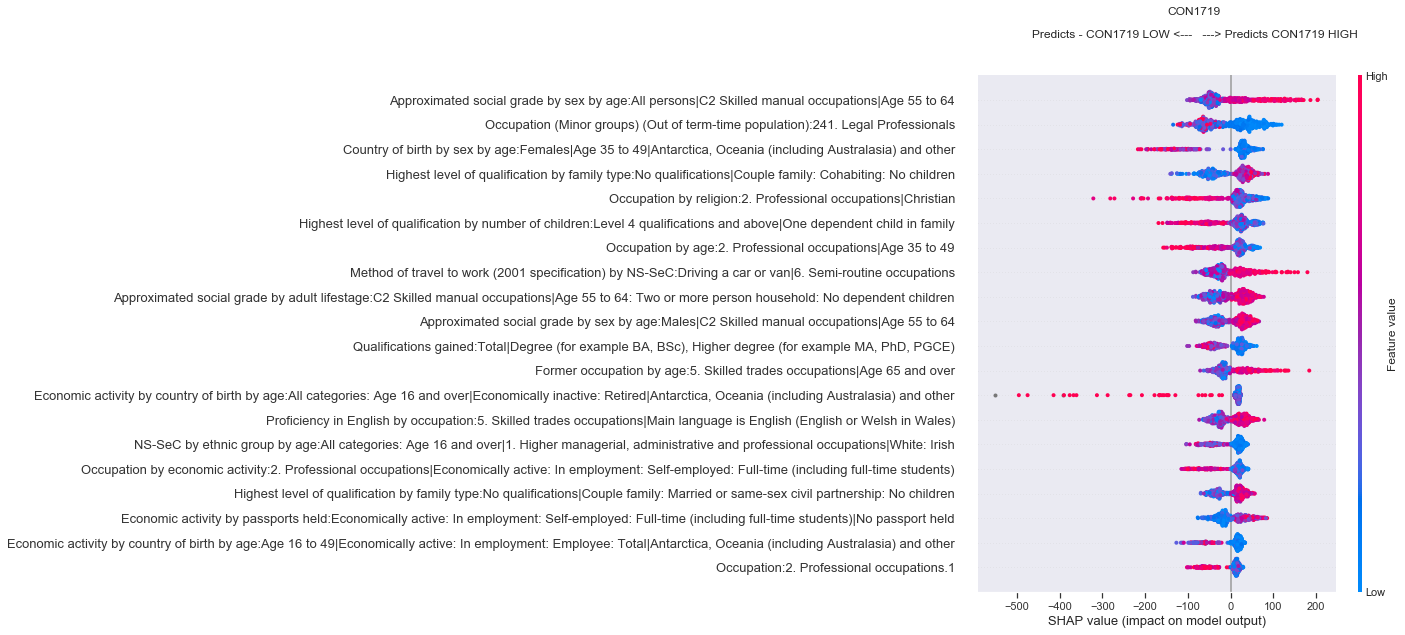

In [40]:
focal_var = "CON1719"

Treatment = "xgboost_CENSUS2011E&W_"+focal_var
var_stub = focal_var
global var_list
var_list = [focal_var]

var_stub_list = [var_stub, focal_var]

# mask = BES_cens["RESULTS2019_BXP"]!=0.0

optional_mask = False
sample_wts = False
drop_other_waves = False

# # Leavers only
# # def optional_mask_fn(wave=[]):
# #     return 1
# #     return BES_cens["RESULTS2019_BXP"]!=0.0
# #(BES_Panel["profile_eurefvote"]=="Leave the EU")
# BES_cens = BES_census_data[BES_census_data.columns[[pd.api.types.is_numeric_dtype( x ) for x in BES_census_data.dtypes]]].copy()
# # BES_cens = panoBES.copy()
# BES_cens.columns = [x.replace("<","LT") for x in BES_cens.columns]
# BES_cens["RESULTS2019_BXP"].replace("0.0",np.nan,inplace=True)


full2011Census[focal_var] = Electoral_vars.loc[full2011Census.index , focal_var]


colname = focal_var
# BES_cens = BES_cens_base[fertility_columns+age_columns+["leaveHanretty"]+["c11Degree"]]
# BES_cens.drop(search(BES_cens,"MRP").index,axis=1,inplace=True)
# BES_cens.drop(["UKIP17","UKIP15","LabVote17","ConVote15","LabVote15","ConVote17","ConVote10","LabVote10"],axis=1,inplace=True)
mask = full2011Census[colname].notnull()
BES_cens = full2011Census[mask].copy()
xgboost_run(subdir=colname,min_features = min(BES_cens.shape[1]-1,20), threshold=500,
           title = colname+"\n\nPredicts - "+focal_var+" LOW <---   ---> Predicts "+focal_var+" HIGH")
full2011Census.drop(focal_var,axis=1,inplace=True)